In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

Loading the csv file from file source. Since the site did'nt have the option to download the file I've used the raw data link

In [3]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are multiple features with null values. We will check the amount of null values present inside each feature.

In [4]:
df_desc = data.describe()
df_desc

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


By describing the data we can observe that columns: other_fuel3, wepp_id, estimated_generation_gwh have no data therefore, we will drop them

In [5]:
for i in df_desc.columns:
    if df_desc[i]["count"]==0:
        data = data.drop(i,axis=1)
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There's still a lot of missing value present inside the dataset therefore we treat the data.

In [6]:
data.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

From the above observation we can see that data features contains more than 60% null values as it will reduce accuracy in our model. 

In [7]:
data.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
other_fuel2                 1
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

We can see that some columns have only 1 unique value. This can cause zero variance bias. When more data is added to the dataset we might get more unique values. Therefore we automate the process to drop all the columns with only one unique value.

In [8]:
unique_features = data.nunique()
for i in unique_features.index:
    if unique_features[i]==1:
        data = data.drop(i,axis=1)
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [9]:
data.dtypes

name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [10]:
data.nunique()

name                   908
gppd_idnr              908
capacity_mw            365
latitude               837
longitude              828
primary_fuel             8
other_fuel1              3
commissioning_year      73
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2013    364
generation_gwh_2014    374
generation_gwh_2015    398
generation_gwh_2016    405
generation_gwh_2017    410
dtype: int64

Since, our data has a lot of columns with categorical string values we have to use encoders. 
"primary_fuel","other_fuel1","geolocation_source"]
Columns:
   1. primary_fuel
   2. other_fuel1
   3. geolocation_source.
    
These columns have categorical data therefore we can use label encoders on these column. 

Meanwhile, columns name and gppd_idnr have unique values for all the elements. Therefore, they will be dropped.

In [11]:
column_list = ["primary_fuel","other_fuel1","geolocation_source"]

In [12]:
data[column_list].isnull().sum()

primary_fuel            0
other_fuel1           709
geolocation_source     19
dtype: int64

We can observe that column other_fuel1 has a lot of missing data therefore we will drop this column

In [13]:
data = data.drop("other_fuel1",axis=1)
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [14]:
data = data[data["geolocation_source"].notnull()]
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


dropping all the rows not containing value for column geolocation_source

In [15]:
data["owner"] = data["owner"].fillna("U")
data["source"] = data["source"].fillna("U")
data["url"] = data["url"].fillna("U")
data

<ipython-input-15-be133ed44877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["owner"] = data["owner"].fillna("U")
<ipython-input-15-be133ed44877>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["source"] = data["source"].fillna("U")
<ipython-input-15-be133ed44877>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,U,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,U,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,U,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,U,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


Assigning a replacement for the missing value so that we can use label encoder on the columns. This value will not affect our model negatively since our model will see this as a value different than the range of values in column

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["primary_fuel"] = le.fit_transform(data["primary_fuel"])
data["source"] = le.fit_transform(data["source"])
data["owner"] = le.fit_transform(data["owner"])
data["url"] = le.fit_transform(data["source"])
data["geolocation_source"] = le.fit_transform(data["geolocation_source"])
data

<ipython-input-16-e776e0ba1809>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["primary_fuel"] = le.fit_transform(data["primary_fuel"])
<ipython-input-16-e776e0ba1809>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["source"] = le.fit_transform(data["source"])
<ipython-input-16-e776e0ba1809>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,2011.0,221,109,109,1,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,NaN,250,174,174,2,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,NaN,2,21,21,2,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,2004.0,246,22,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,2015.0,246,22,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,1,2016.0,246,22,22,2,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,NaN,110,77,77,0,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,NaN,246,21,21,2,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,NaN,88,59,59,2,NaN,NaN,NaN,NaN,NaN


We use label encoder to change string categorical data to numeric categorical data for columns promary_fuel and geolocation_source

In [17]:
data = data.drop(["name","gppd_idnr"],axis=1)
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,221,109,109,1,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,250,174,174,2,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,2,21,21,2,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,246,22,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,246,22,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,246,22,22,2,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,NaN,110,77,77,0,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,7,NaN,246,21,21,2,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,1,NaN,88,59,59,2,NaN,NaN,NaN,NaN,NaN


Dropping name and gppd_idnr columns since they contain string data with completely unique values. However, we can use gppd_idnr if we split the column data into categorical values for elements beginning with IND and elements beginning with WRI

In [18]:
data.nunique()

capacity_mw            361
latitude               837
longitude              828
primary_fuel             8
commissioning_year      73
owner                  272
source                 191
url                    191
geolocation_source       3
generation_gwh_2013    364
generation_gwh_2014    374
generation_gwh_2015    398
generation_gwh_2016    405
generation_gwh_2017    410
dtype: int64

In [19]:
data.isnull().sum()

capacity_mw              0
latitude                27
longitude               27
primary_fuel             0
commissioning_year     365
owner                    0
source                   0
url                      0
geolocation_source       0
generation_gwh_2013    505
generation_gwh_2014    488
generation_gwh_2015    464
generation_gwh_2016    452
generation_gwh_2017    446
dtype: int64

We still have missing values in our dataset which we need to treat.

In [20]:
data.skew()

capacity_mw            3.155985
latitude              -0.143622
longitude              1.100942
primary_fuel           0.518306
commissioning_year    -1.049192
owner                 -1.536340
source                 1.830082
url                    1.830082
geolocation_source    -2.125933
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

# EDA

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


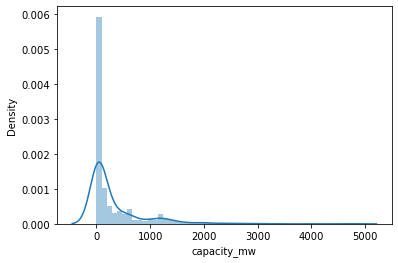

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


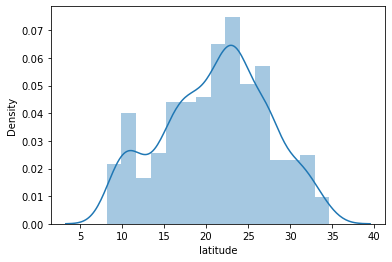

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


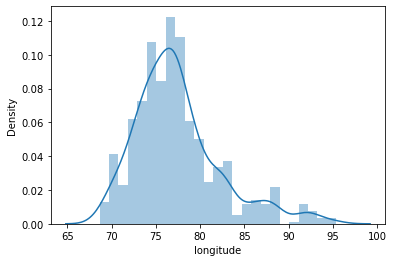

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


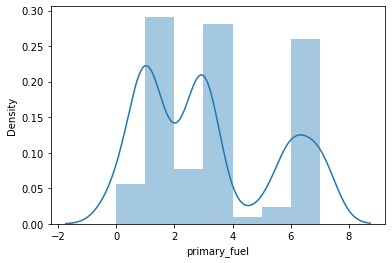

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


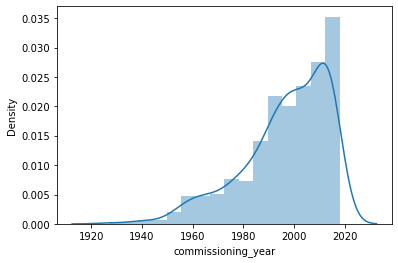

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


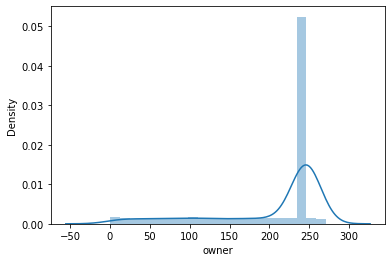

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


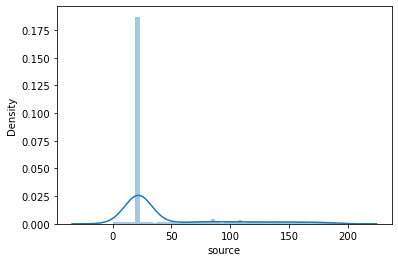

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


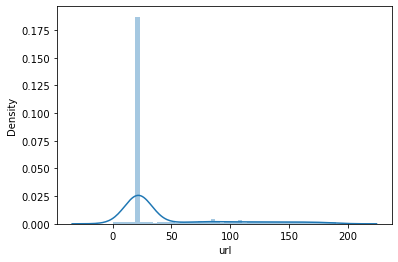

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


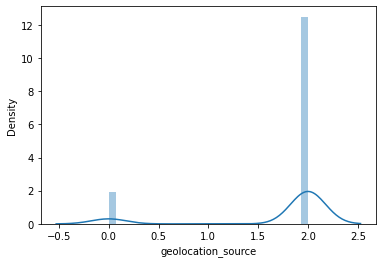

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


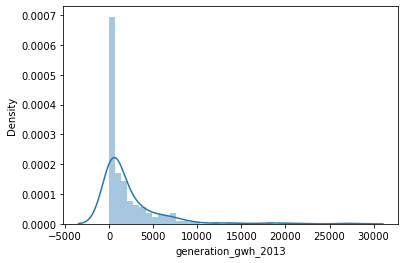

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


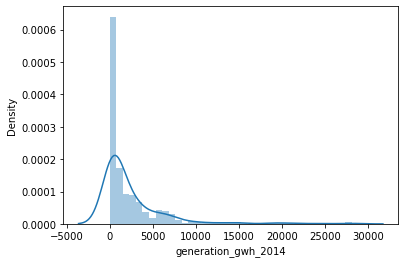

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


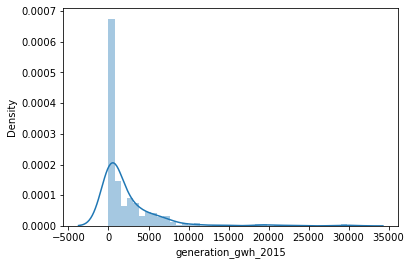

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


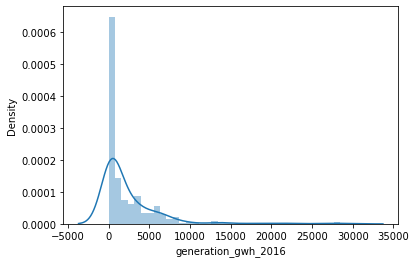

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


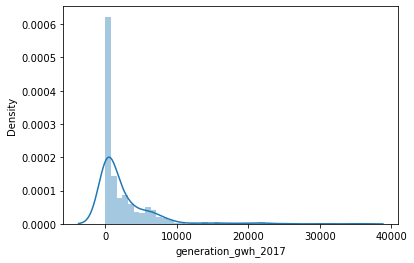

In [21]:
features_skewness = data.skew()
for column in features_skewness.index:
    sns.distplot(data[column])
    plt.show()

From the above distribution plot graphs we can observe that other than latitude, longitude and commisioning_year all other features will have a lot of skewness. Also other than capacity_mw column all other features have missing data therefore, we can remove the skewness by normalizing the distribution

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


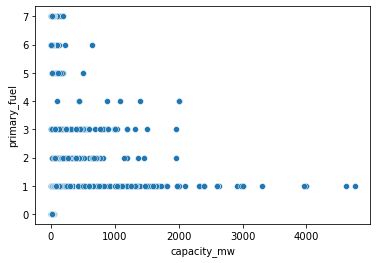

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


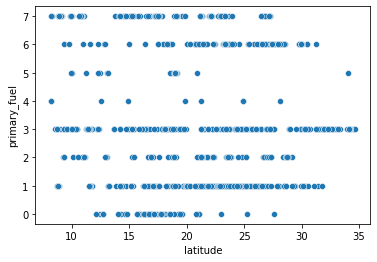

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


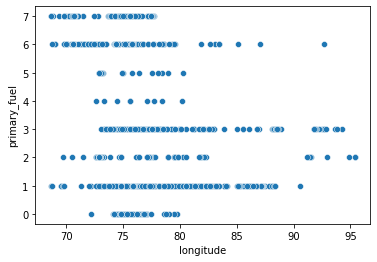

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


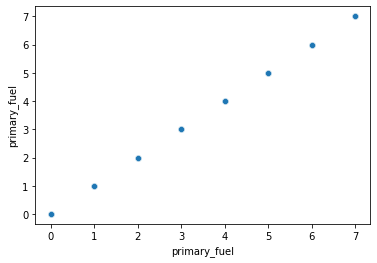

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


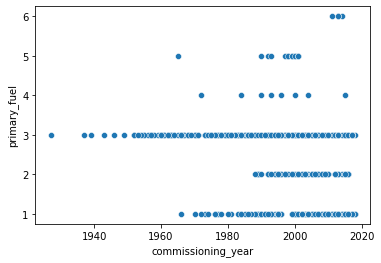

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


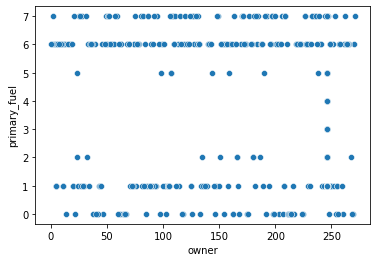

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


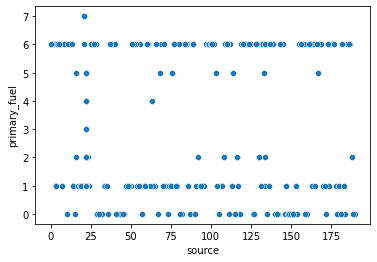

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


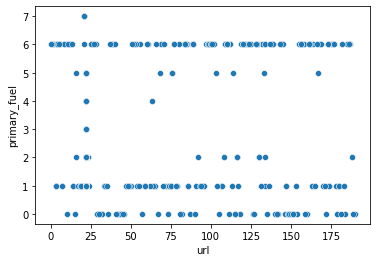

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


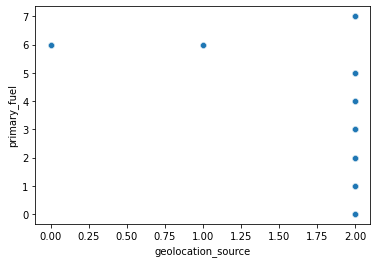

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


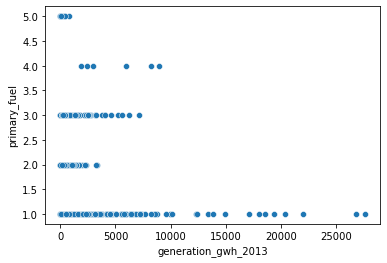

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


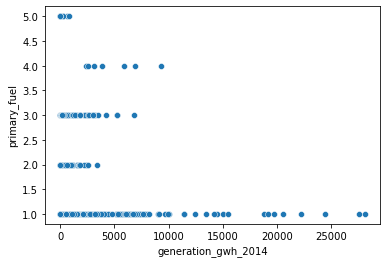

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


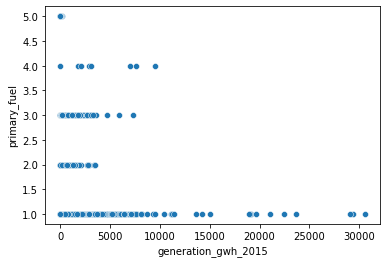

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


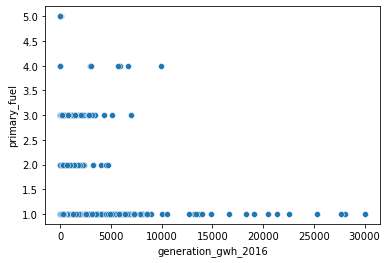

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


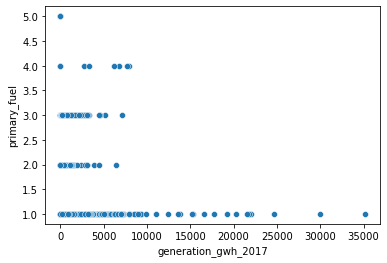

In [22]:
for column in data.columns:
    sns.scatterplot(data[column],data["primary_fuel"])
    plt.show()

# Outliers

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


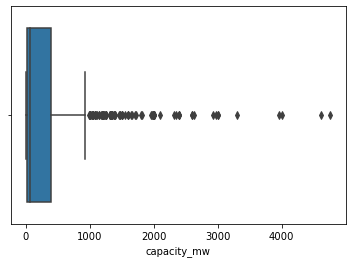

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


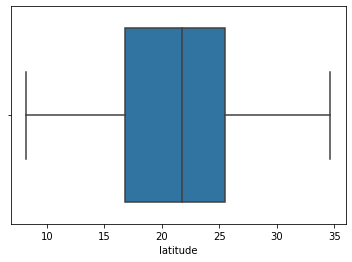

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


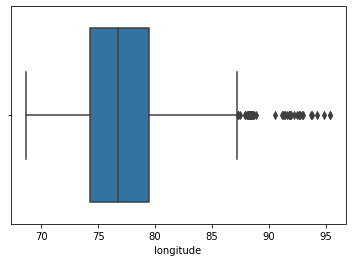

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


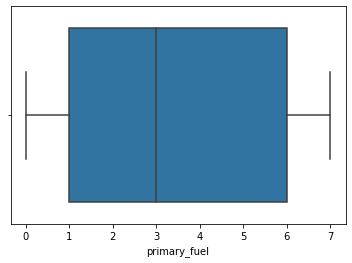

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


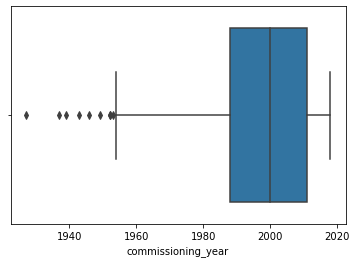

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


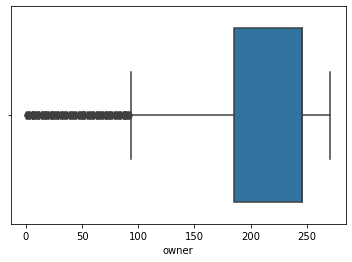

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


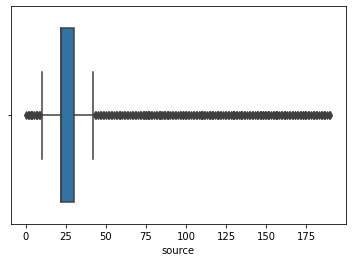

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


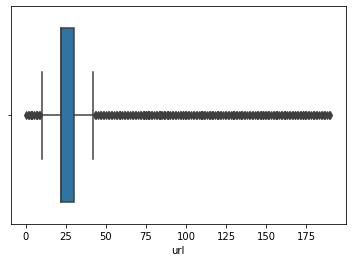

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


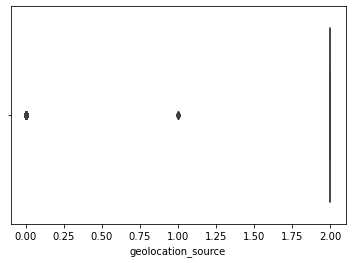

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


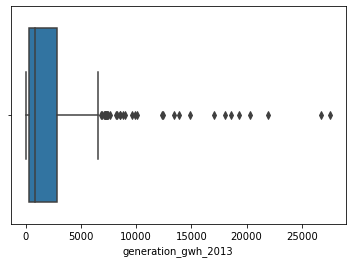

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


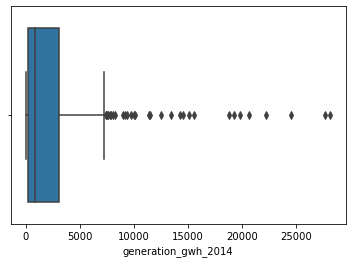

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


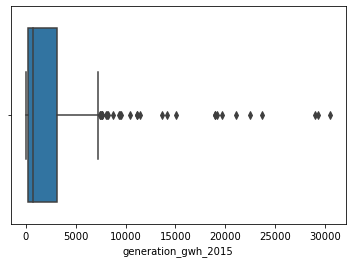

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


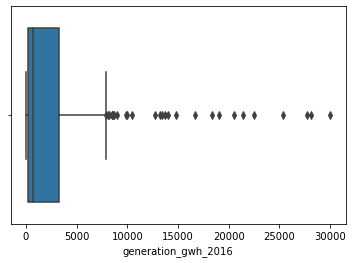

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


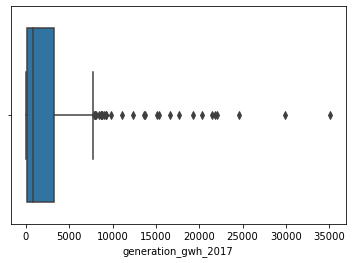

In [23]:
for column in data:
    sns.boxplot(data[column])
    plt.show()

We can see that there are many outliers present inside the dataset. Therefore we cannot remove all the outlier directly and so we will include them in our dataset. As removing so many column could affect the dataset negatively.

# Considering primary_fuel as target

In [24]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,221,109,109,1,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,250,174,174,2,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,2,21,21,2,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,246,22,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,246,22,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,246,22,22,2,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,NaN,110,77,77,0,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,7,NaN,246,21,21,2,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,1,NaN,88,59,59,2,NaN,NaN,NaN,NaN,NaN


In [25]:
X = data.drop("primary_fuel",axis=1)
X_features = X.columns
y = data["primary_fuel"]

In [26]:
y = y.reset_index()
y = y.drop("index",axis=1)
y

,primary_fuel
0,6
1,1
2,7
3,2
4,1
...,...
884,1
885,6
886,7
887,1


We will divide the data into X and Y. X containing the independent variables and y containing target feature "primary_fuel"

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
print(X.shape)

(889, 13)


Using Standard Scaler to scale the feature values to increase model efficiency.

In [28]:
data_pf = pd.DataFrame(X,columns=X_features)
data_pf["primary_fuel"]=y
data_pf

,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel
0,-0.555362,1.118929,-0.857829,0.836965,0.220993,1.453980,1.453980,-1.066322,NaN,NaN,NaN,NaN,NaN,6
1,-0.391985,0.571675,-0.578835,NaN,0.626187,2.906075,2.906075,0.398841,NaN,NaN,NaN,NaN,NaN,1
2,-0.492577,0.113308,-1.646405,NaN,-2.838916,-0.511934,-0.511934,0.398841,NaN,NaN,NaN,NaN,NaN,7
3,-0.328686,0.428344,2.836701,0.425935,0.570298,-0.489594,-0.489594,0.398841,-0.441256,-0.449690,-0.375831,-0.378062,-0.446617,2
4,2.519732,0.122356,1.011590,1.071840,0.570298,-0.489594,-0.489594,0.398841,-0.167757,0.153461,0.838215,0.913625,0.682324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2.177580,-0.784834,-0.018564,1.130559,0.570298,-0.489594,-0.489594,0.398841,NaN,NaN,-0.577529,-0.535372,-0.398410,1
885,-0.554507,-1.329542,0.146307,NaN,-1.329920,0.739102,0.739102,-2.531485,NaN,NaN,NaN,NaN,NaN,6
886,-0.516015,-0.948020,-0.380626,NaN,0.570298,-0.511934,-0.511934,0.398841,NaN,NaN,NaN,NaN,NaN,7
887,-0.422778,0.505014,-0.754453,NaN,-1.637308,0.336984,0.336984,0.398841,NaN,NaN,NaN,NaN,NaN,1


In [29]:
data_pf.isnull().sum()

capacity_mw              0
latitude                27
longitude               27
commissioning_year     365
owner                    0
source                   0
url                      0
geolocation_source       0
generation_gwh_2013    505
generation_gwh_2014    488
generation_gwh_2015    464
generation_gwh_2016    452
generation_gwh_2017    446
primary_fuel             0
dtype: int64

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


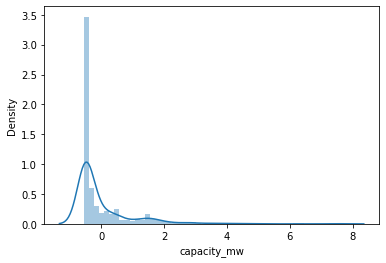

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


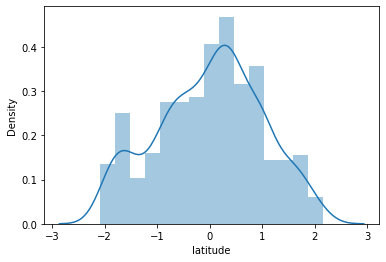

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


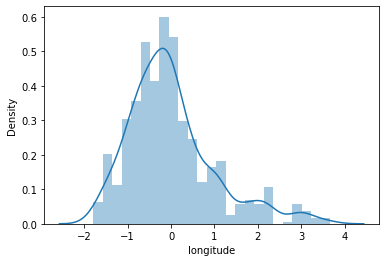

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


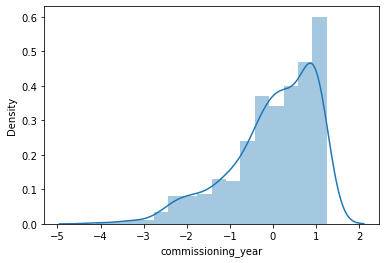

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


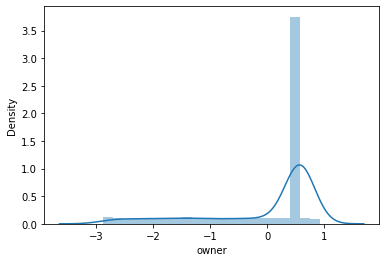

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


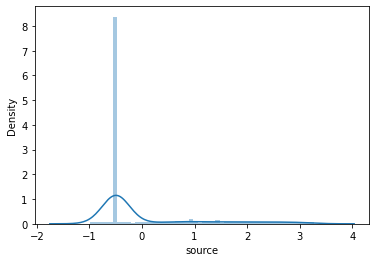

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


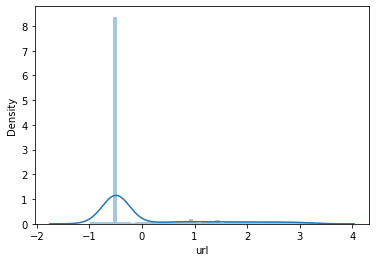

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


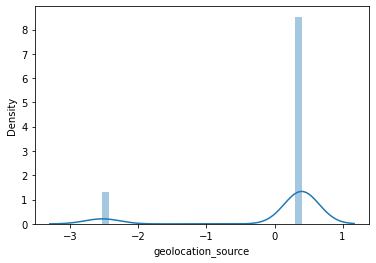

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


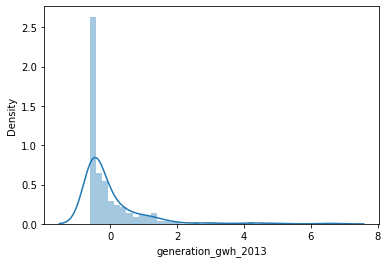

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


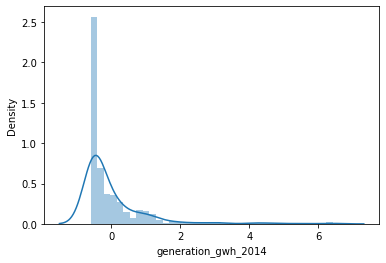

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


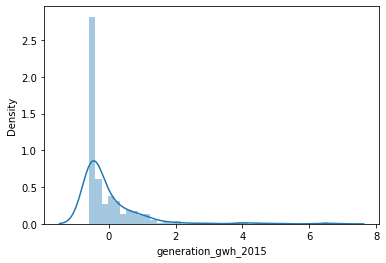

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


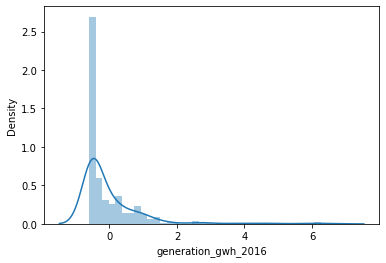

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


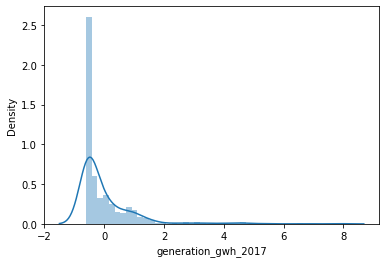

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


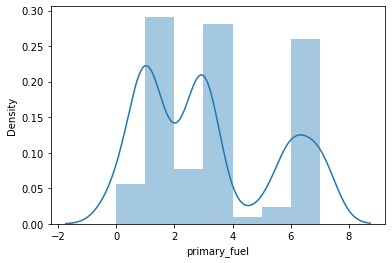

In [30]:
for column in data_pf.columns:
    sns.distplot(data_pf[column])
    plt.show()

Using displot to find the skewness of distribution of data for each feature.
    
    1) capcity_mw - left skewed
    2) latitude - normal 
    3) longitude - slightly left skewed
    4) commisioning_year - right skewed
    5) owner - right skewed
    6) source - left skewed
    7) url - left skewed
    8) geolocation_source - right skewed
    9) generation_gwh_2013 - left skewed
    10) generation_gwh_2014 - left skewed
    11) generation_gwh_2015 - left skewed
    12) generation_gwh_2016 - left skewed
    13) generation_gwh_2017 - left skewed
    

In [31]:
from sklearn.preprocessing import power_transform

X=power_transform(X)
X=pd.DataFrame(X,columns=data_pf.drop('primary_fuel',axis=1).columns)
X

,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-0.967747,1.136368,-0.935821,0.921338,-0.441939,1.724585,1.724585,-2.459390,NaN,NaN,NaN,NaN,NaN
1,-0.235767,0.547817,-0.519832,NaN,0.852076,1.864312,1.864312,0.400716,NaN,NaN,NaN,NaN,NaN
2,-0.662845,0.072780,-2.315977,NaN,-1.774506,-0.553026,-0.553026,0.400716,NaN,NaN,NaN,NaN,NaN
3,-0.002971,0.397280,2.135311,0.269942,0.622662,-0.454333,-0.454333,0.400716,-0.472538,-0.501304,-0.271851,-0.256363,-0.473868
4,1.834749,0.081964,1.078477,1.348092,0.622662,-0.454333,-0.454333,0.400716,0.360314,0.931621,1.475868,1.486651,1.343354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,1.803893,-0.799641,0.186013,1.460786,0.622662,-0.454333,-0.454333,0.400716,NaN,NaN,-1.105071,-0.854191,-0.308219
885,-0.963384,-1.301848,0.357808,NaN,-1.589983,1.536509,1.536509,-2.496731,NaN,NaN,NaN,NaN,NaN
886,-0.773077,-0.951751,-0.249466,NaN,0.622662,-0.553026,-0.553026,0.400716,NaN,NaN,NaN,NaN,NaN
887,-0.358817,0.477597,-0.776999,NaN,-1.647009,1.311177,1.311177,0.400716,NaN,NaN,NaN,NaN,NaN


Transforming data to normal distribution using power transform from sklearn.preprocessing

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


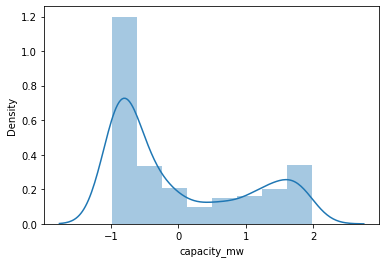

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


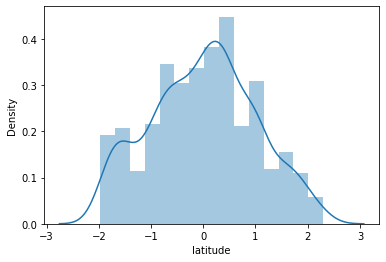

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


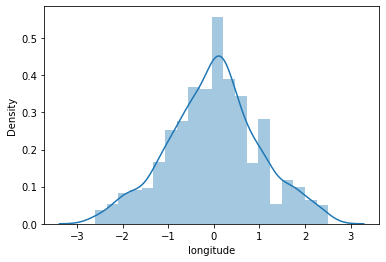

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


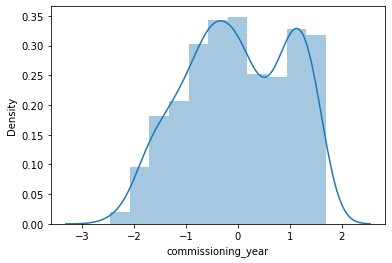

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


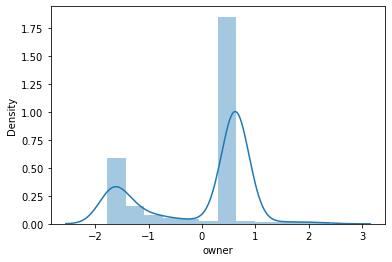

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


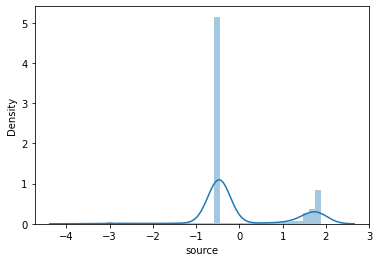

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


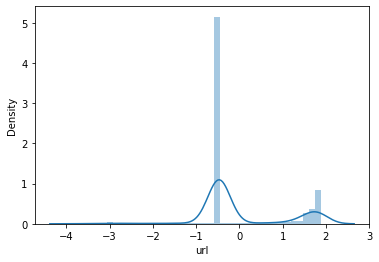

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


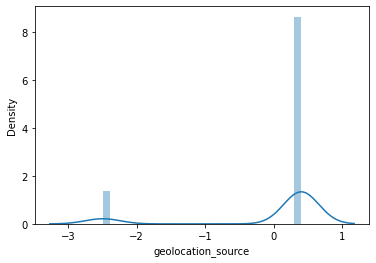

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


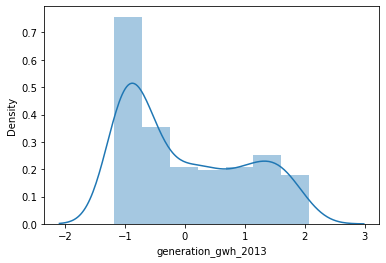

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


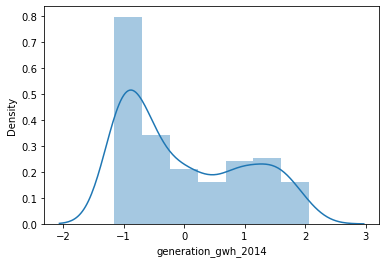

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


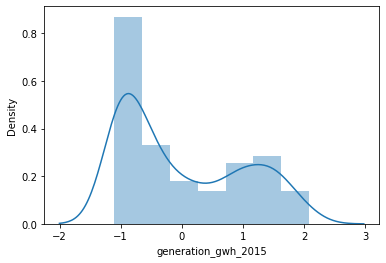

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


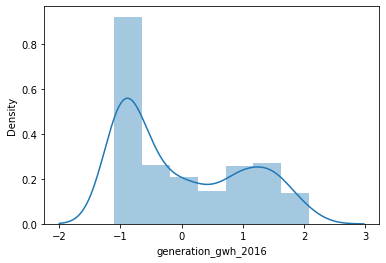

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


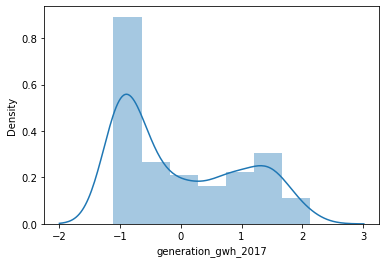

In [32]:
for column in X_features:
    sns.distplot(X[column])
    plt.show()

Normalised distribution can be seen here

In [33]:
X.skew()

capacity_mw            0.716467
latitude               0.009541
longitude             -0.016293
commissioning_year    -0.140878
owner                 -0.785994
source                 0.632195
url                    0.632195
geolocation_source    -2.098375
generation_gwh_2013    0.509621
generation_gwh_2014    0.514132
generation_gwh_2015    0.528478
generation_gwh_2016    0.517463
generation_gwh_2017    0.501117
dtype: float64

We will drop geolocation_source column since it has a lot of skewness even after transform.

In [34]:
data_pf = data_pf.drop("geolocation_source",axis=1)
data_pf

,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel
0,-0.555362,1.118929,-0.857829,0.836965,0.220993,1.453980,1.453980,NaN,NaN,NaN,NaN,NaN,6
1,-0.391985,0.571675,-0.578835,NaN,0.626187,2.906075,2.906075,NaN,NaN,NaN,NaN,NaN,1
2,-0.492577,0.113308,-1.646405,NaN,-2.838916,-0.511934,-0.511934,NaN,NaN,NaN,NaN,NaN,7
3,-0.328686,0.428344,2.836701,0.425935,0.570298,-0.489594,-0.489594,-0.441256,-0.449690,-0.375831,-0.378062,-0.446617,2
4,2.519732,0.122356,1.011590,1.071840,0.570298,-0.489594,-0.489594,-0.167757,0.153461,0.838215,0.913625,0.682324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2.177580,-0.784834,-0.018564,1.130559,0.570298,-0.489594,-0.489594,NaN,NaN,-0.577529,-0.535372,-0.398410,1
885,-0.554507,-1.329542,0.146307,NaN,-1.329920,0.739102,0.739102,NaN,NaN,NaN,NaN,NaN,6
886,-0.516015,-0.948020,-0.380626,NaN,0.570298,-0.511934,-0.511934,NaN,NaN,NaN,NaN,NaN,7
887,-0.422778,0.505014,-0.754453,NaN,-1.637308,0.336984,0.336984,NaN,NaN,NaN,NaN,NaN,1


In [35]:
data_pf.isnull().sum()

capacity_mw              0
latitude                27
longitude               27
commissioning_year     365
owner                    0
source                   0
url                      0
generation_gwh_2013    505
generation_gwh_2014    488
generation_gwh_2015    464
generation_gwh_2016    452
generation_gwh_2017    446
primary_fuel             0
dtype: int64

In [36]:
data_pf.nunique()

capacity_mw            361
latitude               837
longitude              828
commissioning_year      73
owner                  272
source                 191
url                    191
generation_gwh_2013    364
generation_gwh_2014    374
generation_gwh_2015    398
generation_gwh_2016    405
generation_gwh_2017    410
primary_fuel             8
dtype: int64

In [37]:
for column in data_pf.columns:
    data_pf[column] = data_pf[column].fillna(data_pf[column].mean())
data_pf

,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel
0,-0.555362,1.118929,-0.857829,8.369655e-01,0.220993,1.453980,1.453980,5.435467e-17,1.301259e-17,4.440892e-18,-4.115701e-17,3.408360e-17,6
1,-0.391985,0.571675,-0.578835,-3.698483e-15,0.626187,2.906075,2.906075,5.435467e-17,1.301259e-17,4.440892e-18,-4.115701e-17,3.408360e-17,1
2,-0.492577,0.113308,-1.646405,-3.698483e-15,-2.838916,-0.511934,-0.511934,5.435467e-17,1.301259e-17,4.440892e-18,-4.115701e-17,3.408360e-17,7
3,-0.328686,0.428344,2.836701,4.259346e-01,0.570298,-0.489594,-0.489594,-4.412558e-01,-4.496897e-01,-3.758307e-01,-3.780623e-01,-4.466172e-01,2
4,2.519732,0.122356,1.011590,1.071840e+00,0.570298,-0.489594,-0.489594,-1.677570e-01,1.534611e-01,8.382154e-01,9.136251e-01,6.823240e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2.177580,-0.784834,-0.018564,1.130559e+00,0.570298,-0.489594,-0.489594,5.435467e-17,1.301259e-17,-5.775291e-01,-5.353719e-01,-3.984104e-01,1
885,-0.554507,-1.329542,0.146307,-3.698483e-15,-1.329920,0.739102,0.739102,5.435467e-17,1.301259e-17,4.440892e-18,-4.115701e-17,3.408360e-17,6
886,-0.516015,-0.948020,-0.380626,-3.698483e-15,0.570298,-0.511934,-0.511934,5.435467e-17,1.301259e-17,4.440892e-18,-4.115701e-17,3.408360e-17,7
887,-0.422778,0.505014,-0.754453,-3.698483e-15,-1.637308,0.336984,0.336984,5.435467e-17,1.301259e-17,4.440892e-18,-4.115701e-17,3.408360e-17,1


In [38]:
corr_matrix = data_pf.corr()
corr_matrix

,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel
capacity_mw,1.000000,0.049921,0.197640,0.272299,2.792771e-01,-2.453473e-01,-2.453473e-01,6.695916e-01,7.072823e-01,7.239732e-01,7.548012e-01,7.690494e-01,-0.372264
latitude,0.049921,1.000000,0.031501,0.095860,1.071403e-04,5.633109e-02,5.633109e-02,3.663949e-02,4.408464e-02,3.612730e-02,3.093239e-02,3.065498e-02,-0.013828
longitude,0.197640,0.031501,1.000000,0.088473,2.576817e-01,-2.406664e-01,-2.406664e-01,1.402097e-02,1.166872e-02,1.917647e-02,3.975774e-02,4.040690e-02,-0.358422
commissioning_year,0.272299,0.095860,0.088473,1.000000,-7.552478e-03,1.070396e-02,1.070396e-02,1.112791e-01,1.348274e-01,1.498843e-01,1.733689e-01,1.740744e-01,-0.136836
owner,0.279277,0.000107,0.257682,-0.007552,1.000000e+00,-1.637635e-01,-1.637635e-01,6.183789e-19,-2.771671e-17,3.602809e-17,-1.732065e-18,-1.972063e-17,-0.235604
source,-0.245347,0.056331,-0.240666,0.010704,-1.637635e-01,1.000000e+00,1.000000e+00,1.261366e-17,-3.077926e-17,-1.562340e-17,3.241655e-17,-1.015860e-18,0.061949
url,-0.245347,0.056331,-0.240666,0.010704,-1.637635e-01,1.000000e+00,1.000000e+00,1.261366e-17,-3.077926e-17,-1.562340e-17,3.241655e-17,-1.015860e-18,0.061949
generation_gwh_2013,0.669592,0.036639,0.014021,0.111279,6.183789e-19,1.261366e-17,1.261366e-17,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01,-0.123868
generation_gwh_2014,0.707282,0.044085,0.011669,0.134827,-2.771671e-17,-3.077926e-17,-3.077926e-17,9.634535e-01,1.000000e+00,9.537116e-01,9.260100e-01,8.918721e-01,-0.128481
generation_gwh_2015,0.723973,0.036127,0.019176,0.149884,3.602809e-17,-1.562340e-17,-1.562340e-17,8.963761e-01,9.537116e-01,1.000000e+00,9.689693e-01,9.284589e-01,-0.128623


<AxesSubplot:>

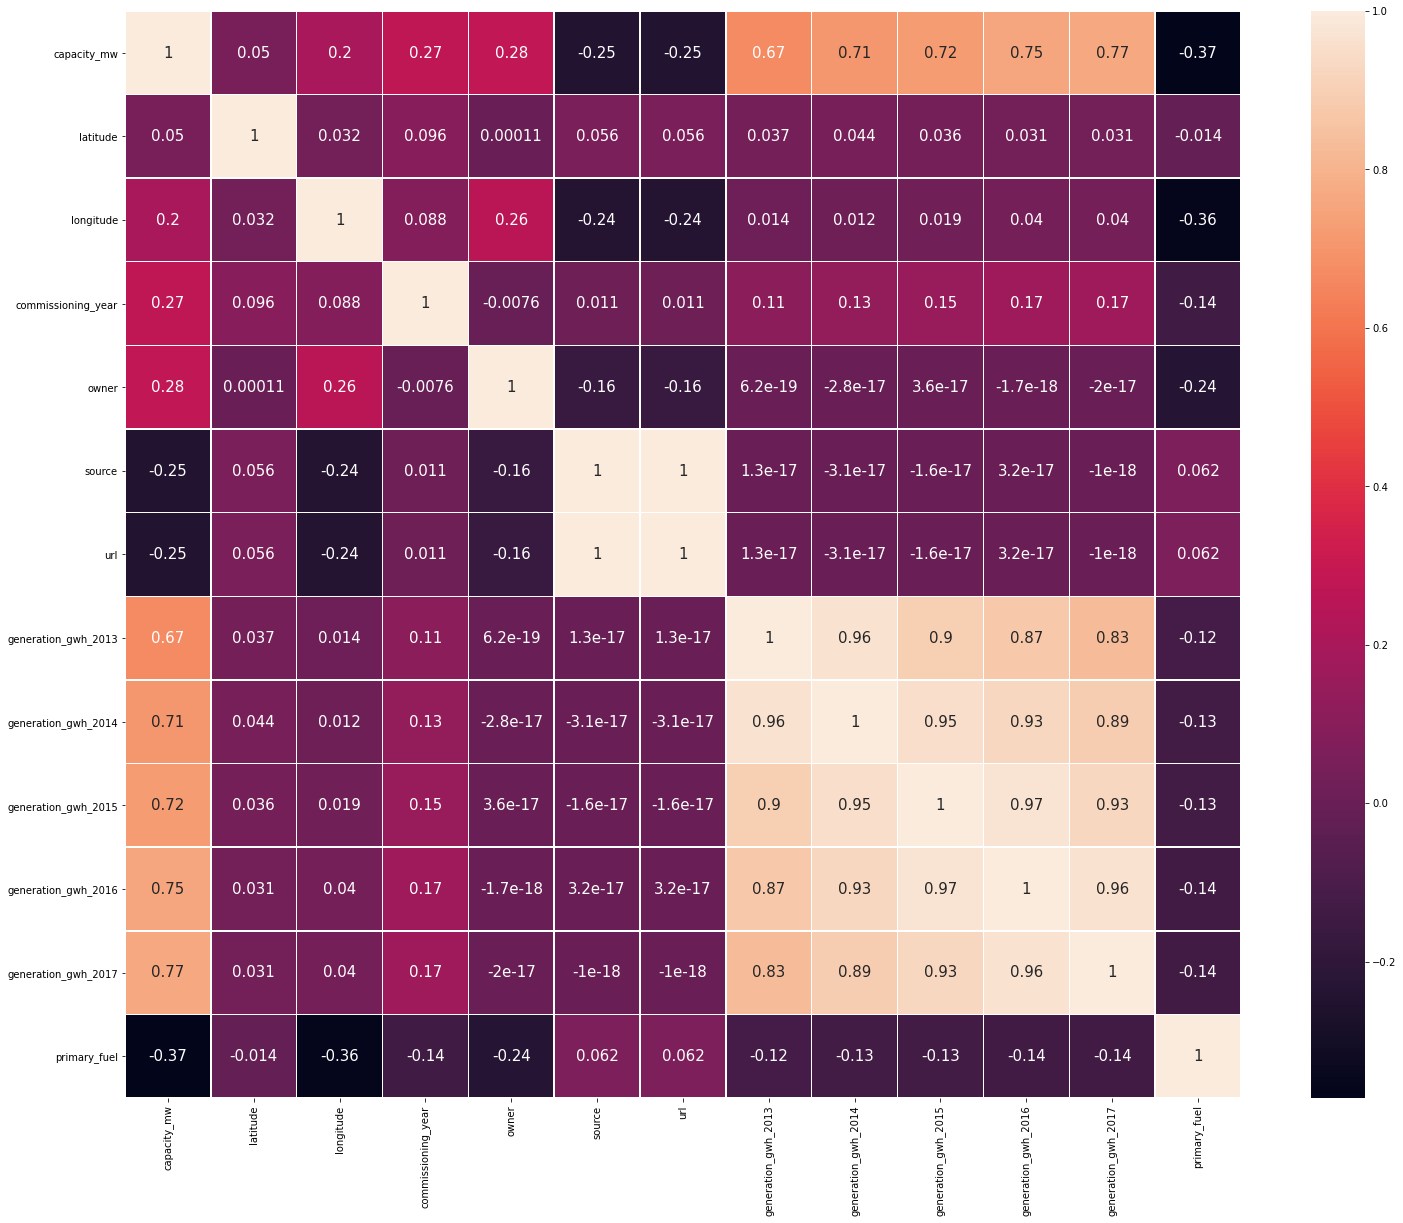

In [39]:
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

Dropping columns generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016, generation_gwh_2017 due to high volume of missing data.

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA()

X = data_pf.drop("primary_fuel",axis=1)
X = pca.fit_transform(X)
X

array([[-7.74808107e-01,  2.06249117e+00,  8.88089606e-01, ...,
         6.20837439e-03,  6.22498046e-03, -1.25867503e-17],
       [-1.23173090e+00,  3.59121131e+00,  1.80617391e+00, ...,
         2.99572798e-03,  1.39297633e-04, -4.01311747e-17],
       [-6.22225944e-01,  4.90681384e-01, -2.98688848e+00, ...,
         9.46008348e-03, -1.43080261e-03, -3.35314738e-16],
       ...,
       [-9.62441453e-02, -7.09478446e-01, -4.76869738e-01, ...,
        -1.07783682e-03, -1.30947048e-03,  2.41696775e-17],
       [-6.21052825e-01,  1.02936152e+00, -1.15055801e+00, ...,
         4.86745655e-03,  6.78710252e-05,  4.27296211e-18],
       [-3.85729419e-02, -9.52247863e-01, -3.47547925e-01, ...,
        -7.56180490e-03, -1.84596994e-03,  9.76405284e-18]])

Using PCA to transform data and remove feature data with low variance. We can see the PCA feature's against it's variance the below diagram.

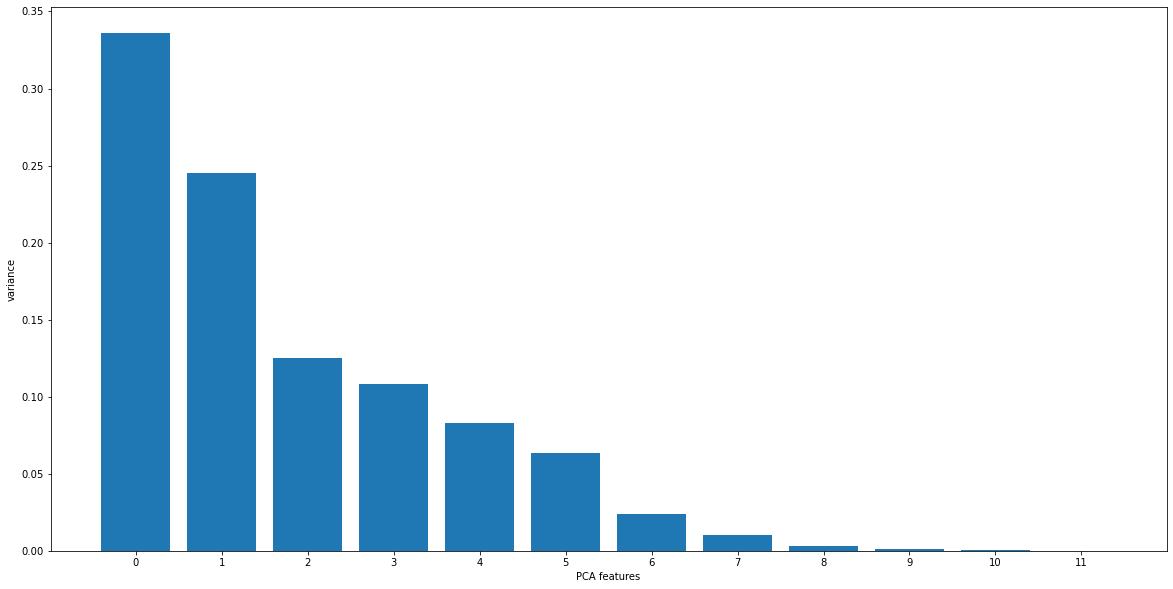

In [42]:
features = range(pca.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [43]:
pca = PCA(n_components = 6)

X = data_pf.drop("primary_fuel",axis=1)
X = pca.fit_transform(X)
X

array([[-0.77480811,  2.06249117,  0.88808961,  0.75549812, -0.58923787,
        -0.71334566],
       [-1.2317309 ,  3.59121131,  1.80617391, -0.38802406, -0.51859947,
         0.02021964],
       [-0.62222594,  0.49068138, -2.98688848,  1.3420289 ,  0.31359696,
        -0.19435948],
       ...,
       [-0.09624415, -0.70947845, -0.47686974, -0.88310753, -0.46566424,
        -0.15438729],
       [-0.62105283,  1.02936152, -1.15055801,  1.00447582,  0.33883863,
         0.02458719],
       [-0.03857294, -0.95224786, -0.34754793, -1.80436688, -0.21359786,
        -0.19095902]])

We can observe from the above diagram that 6 pca features makes up for a large amount of variance so we'll loose the features with variance lower than them.

In [44]:
features = []
for i in range(1,len(X[0])+1):
    features.append("f"+str(i))
features

['f1', 'f2', 'f3', 'f4', 'f5', 'f6']

In [45]:
df_pf = pd.DataFrame(X,columns=features)
df_pf

,f1,f2,f3,f4,f5,f6
0,-0.774808,2.062491,0.888090,0.755498,-0.589238,-0.713346
1,-1.231731,3.591211,1.806174,-0.388024,-0.518599,0.020220
2,-0.622226,0.490681,-2.986888,1.342029,0.313597,-0.194359
3,-0.240647,-1.786383,1.879308,0.224160,1.804561,0.166140
4,2.700146,-0.578619,0.886595,-0.008383,0.430512,-1.011173
...,...,...,...,...,...,...
884,0.938884,-0.994042,0.290778,-0.699126,-0.225120,-1.673585
885,-0.737533,1.080699,-0.923095,-0.921701,1.242560,-0.001188
886,-0.096244,-0.709478,-0.476870,-0.883108,-0.465664,-0.154387
887,-0.621053,1.029362,-1.150558,1.004476,0.338839,0.024587


Creating a dataframe with PCA data.

In [46]:
df_pf["primary_fuel"] = data_pf["primary_fuel"]
df_pf

,f1,f2,f3,f4,f5,f6,primary_fuel
0,-0.774808,2.062491,0.888090,0.755498,-0.589238,-0.713346,6
1,-1.231731,3.591211,1.806174,-0.388024,-0.518599,0.020220,1
2,-0.622226,0.490681,-2.986888,1.342029,0.313597,-0.194359,7
3,-0.240647,-1.786383,1.879308,0.224160,1.804561,0.166140,2
4,2.700146,-0.578619,0.886595,-0.008383,0.430512,-1.011173,1
...,...,...,...,...,...,...,...
884,0.938884,-0.994042,0.290778,-0.699126,-0.225120,-1.673585,1
885,-0.737533,1.080699,-0.923095,-0.921701,1.242560,-0.001188,6
886,-0.096244,-0.709478,-0.476870,-0.883108,-0.465664,-0.154387,7
887,-0.621053,1.029362,-1.150558,1.004476,0.338839,0.024587,1


In [47]:
corr_matrix = df_pf.corr()
corr_matrix

,f1,f2,f3,f4,f5,f6,primary_fuel
f1,1.000000e+00,3.941175e-16,9.798817e-17,-1.978501e-17,-4.215252e-18,-8.116641e-18,-0.266486
f2,3.941175e-16,1.000000e+00,-3.768294e-17,1.797232e-17,4.099811e-17,-2.381134e-16,0.103483
f3,9.798817e-17,-3.768294e-17,1.000000e+00,8.248053e-17,3.488093e-16,9.461970e-17,-0.309038
f4,-1.978501e-17,1.797232e-17,8.248053e-17,1.000000e+00,3.126727e-16,-7.887202e-17,0.082443
f5,-4.215252e-18,4.099811e-17,3.488093e-16,3.126727e-16,1.000000e+00,-1.696193e-16,-0.142733
f6,-8.116641e-18,-2.381134e-16,9.461970e-17,-7.887202e-17,-1.696193e-16,1.000000e+00,0.059056
primary_fuel,-2.664856e-01,1.034830e-01,-3.090381e-01,8.244328e-02,-1.427332e-01,5.905640e-02,1.000000


correlation matrix for PCA transformed dataset

<AxesSubplot:>

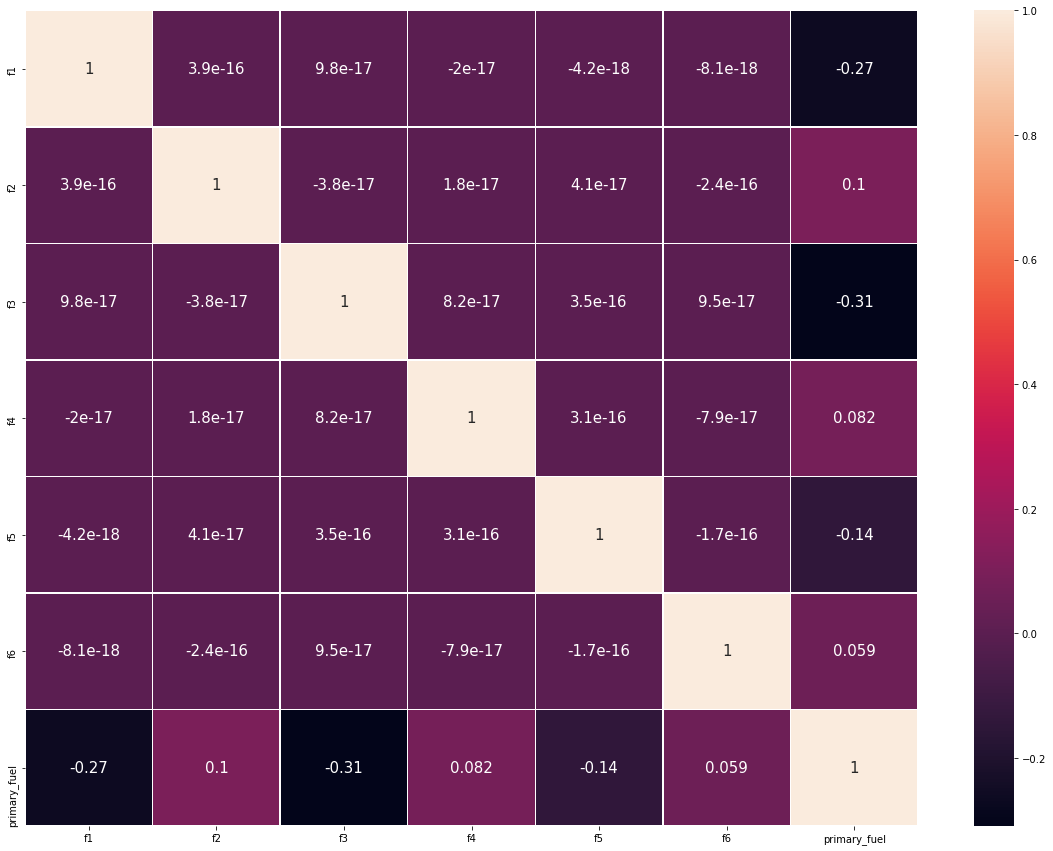

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

from the above heatmap we can see that all the data features are either weakly correlated to the target or negatively correlated.

In [49]:
X = df_pf.drop("primary_fuel",axis=1)
X

,f1,f2,f3,f4,f5,f6
0,-0.774808,2.062491,0.888090,0.755498,-0.589238,-0.713346
1,-1.231731,3.591211,1.806174,-0.388024,-0.518599,0.020220
2,-0.622226,0.490681,-2.986888,1.342029,0.313597,-0.194359
3,-0.240647,-1.786383,1.879308,0.224160,1.804561,0.166140
4,2.700146,-0.578619,0.886595,-0.008383,0.430512,-1.011173
...,...,...,...,...,...,...
884,0.938884,-0.994042,0.290778,-0.699126,-0.225120,-1.673585
885,-0.737533,1.080699,-0.923095,-0.921701,1.242560,-0.001188
886,-0.096244,-0.709478,-0.476870,-0.883108,-0.465664,-0.154387
887,-0.621053,1.029362,-1.150558,1.004476,0.338839,0.024587


In [50]:
y = df_pf["primary_fuel"]
y


0      6
1      1
2      7
3      2
4      1
      ..
884    1
885    6
886    7
887    1
888    7
Name: primary_fuel, Length: 889, dtype: int64

### Class Imbalance

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


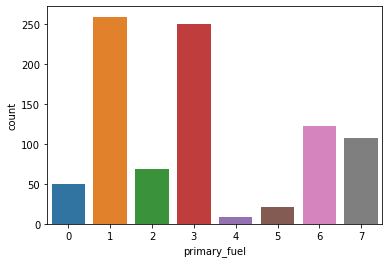

In [51]:
sns.countplot(y)
plt.show()

We have class imbalance in the dataset. Therefore, we will use f1 score instead of accuracy score to find the model accuracy.

## Data Preprocessing

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

Splitting data into training and testing set

# Model Learning for Primay Fuel

### KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Loading KNN Classifier and creating an object of the model with 3 nearest neighbours

In [56]:
y_pred = knn.predict(X_test)
y_pred

array([3, 1, 7, 7, 3, 7, 1, 0, 1, 6, 0, 6, 7, 3, 5, 0, 1, 3, 3, 3, 1, 3,
       1, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 3, 6, 3, 0, 3,
       7, 3, 1, 1, 6, 1, 1, 6, 3, 6, 7, 1, 3, 1, 1, 2, 3, 3, 7, 3, 1, 1,
       6, 7, 7, 6, 6, 3, 2, 6, 1, 7, 3, 3, 3, 6, 6, 0, 7, 1, 6, 1, 6, 3,
       0, 3, 1, 3, 1, 3, 1, 7, 1, 0, 1, 1, 0, 3, 0, 1, 3, 0, 0, 3, 3, 2,
       2, 1, 1, 1, 0, 1, 7, 3, 2, 7, 1, 3, 3, 6, 1, 7, 3, 3, 6, 3, 1, 3,
       6, 3, 6, 1, 6, 2, 7, 0, 0, 1, 3, 6, 7, 7, 3, 3, 1, 1, 1, 7, 7, 3,
       3, 3, 0, 1, 3, 3, 1, 3, 1, 3, 7, 3, 2, 1, 1, 6, 0, 6, 1, 1, 1, 3,
       3, 0])

predicted value of the test data

In [57]:
y_test[:50]

14     3
158    2
762    7
740    7
482    3
261    7
618    1
706    0
533    1
548    6
253    0
31     6
643    3
144    3
572    3
352    0
97     1
566    3
691    3
584    3
788    1
626    3
571    1
657    6
698    3
60     3
372    3
55     3
511    1
491    1
77     3
646    1
846    1
873    1
484    2
493    3
453    2
441    1
412    1
613    3
497    6
252    3
634    1
868    7
456    3
831    3
364    1
279    6
196    6
413    1
Name: primary_fuel, dtype: int64

In [58]:
from sklearn.metrics import f1_score

knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_f1

0.7165636530403786

Since, class imbalance is present in the data we cannot use accuracy score for classification models. Thus, we use f1 score instead.

In [59]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
cf

array([[ 9,  1,  0,  0,  0,  2,  0],
       [ 5, 36,  1,  1,  0,  3,  0],
       [ 2,  2,  2,  1,  0,  0,  0],
       [ 0,  7,  5, 44,  1,  0,  2],
       [ 2,  0,  1,  1,  0,  0,  0],
       [ 3,  7,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  4,  0,  0, 19]])

In [60]:
from sklearn.model_selection import KFold,cross_val_score

k_fold = KFold(n_splits=4, shuffle=True, random_state=0)
clf = KNeighborsClassifier()
scores_knn = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_knn

array([0.73542601, 0.72072072, 0.73873874, 0.6981982 ])

We cross validate the score we got using model_selection library function KFold and cross_val_score to find the mean and standard deviation of the cross validation scores.

In [61]:
print(np.mean(scores_knn),np.std(scores_knn))
knn_std = np.std(scores_knn)

0.723270916656567 0.015985497327920702


We repeat the above model procedures for all other models.

### Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DTC = DecisionTreeClassifier(max_depth=50)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=50)

In [64]:
y_pred = DTC.predict(X_test)
y_pred

array([3, 3, 7, 7, 3, 7, 1, 1, 1, 6, 0, 6, 2, 3, 5, 0, 1, 3, 3, 3, 2, 1,
       1, 1, 2, 3, 3, 3, 1, 6, 1, 1, 1, 1, 5, 2, 5, 1, 1, 3, 6, 3, 0, 7,
       7, 3, 4, 7, 6, 1, 3, 6, 3, 6, 7, 1, 3, 3, 1, 2, 2, 3, 1, 3, 1, 1,
       0, 3, 7, 6, 6, 3, 3, 6, 0, 7, 3, 3, 3, 6, 6, 0, 7, 1, 1, 1, 6, 3,
       1, 3, 2, 3, 1, 2, 2, 7, 2, 0, 2, 6, 0, 3, 1, 6, 3, 0, 6, 3, 3, 1,
       2, 1, 1, 1, 1, 3, 7, 2, 1, 7, 1, 7, 3, 1, 3, 3, 1, 3, 0, 3, 1, 3,
       6, 3, 6, 2, 0, 3, 7, 1, 1, 1, 2, 6, 7, 7, 3, 3, 1, 3, 6, 7, 7, 3,
       4, 3, 0, 1, 3, 1, 1, 3, 0, 3, 7, 3, 3, 4, 1, 6, 6, 6, 1, 1, 2, 3,
       3, 0])

In [65]:
dtc_f1 = f1_score(y_test, y_pred, average='weighted')
dtc_f1

0.6431915470096984

In [66]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[ 6,  4,  0,  0,  0,  0,  2,  0],
       [ 5, 28,  4,  4,  1,  0,  4,  0],
       [ 0,  1,  2,  2,  0,  2,  0,  0],
       [ 0,  4, 10, 41,  2,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  1,  0],
       [ 3,  7,  0,  0,  0,  0, 16,  1],
       [ 0,  1,  0,  4,  0,  0,  0, 18]])

In [67]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
scores_dtc = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_dtc

array([0.66367713, 0.67117117, 0.72072072, 0.6981982 ])

In [68]:
print(np.mean(scores_dtc),np.std(scores_dtc))
dtc_std = np.std(scores_dtc)

0.6884418050337333 0.02263117057747621


### GaussianNB Classifier

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [71]:
y_pred = gnb.predict(X_test)
y_pred

array([3, 3, 7, 7, 3, 7, 1, 0, 3, 6, 0, 6, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3,
       1, 6, 3, 3, 3, 3, 6, 0, 4, 1, 3, 6, 7, 2, 0, 1, 1, 3, 6, 3, 6, 7,
       7, 1, 1, 6, 1, 1, 1, 6, 3, 6, 7, 6, 3, 2, 3, 2, 3, 3, 7, 3, 1, 6,
       6, 7, 7, 6, 6, 7, 3, 6, 0, 7, 3, 7, 3, 6, 0, 7, 7, 3, 6, 3, 6, 3,
       0, 3, 3, 3, 1, 3, 3, 7, 3, 0, 3, 6, 6, 2, 6, 0, 3, 0, 6, 3, 3, 3,
       3, 1, 3, 1, 0, 1, 7, 3, 3, 7, 3, 7, 3, 6, 1, 7, 3, 3, 0, 3, 6, 2,
       6, 3, 6, 4, 0, 3, 7, 0, 0, 3, 1, 6, 7, 7, 3, 3, 1, 3, 6, 7, 7, 3,
       3, 3, 0, 1, 3, 3, 3, 3, 0, 3, 7, 3, 1, 1, 1, 6, 6, 6, 1, 3, 1, 3,
       2, 6])

In [72]:
gnb_f1 = f1_score(y_test, y_pred, average='weighted')
gnb_f1

0.6611283504670545

In [73]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[10,  0,  0,  0,  0,  0,  2,  0],
       [ 3, 19,  0, 15,  1,  0,  8,  0],
       [ 1,  1,  0,  4,  0,  0,  0,  1],
       [ 0,  4,  6, 47,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  1,  0],
       [ 3,  1,  0,  0,  0,  0, 22,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 23]])

In [74]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = GaussianNB()
scores_gnb = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_gnb

array([0.65656566, 0.61486486, 0.59797297])

In [75]:
print(np.mean(scores_gnb),np.std(scores_gnb))
gnb_std = np.std(scores_gnb)

0.6231344981344982 0.02462472698269974


### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc=RandomForestClassifier(max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [78]:
y_pred=rfc.predict(X_test)
y_pred

array([3, 1, 7, 7, 3, 7, 1, 0, 1, 6, 0, 6, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3,
       1, 6, 3, 3, 3, 1, 1, 6, 1, 1, 1, 1, 5, 3, 6, 1, 1, 3, 6, 3, 6, 7,
       7, 3, 1, 6, 6, 1, 3, 6, 3, 6, 7, 1, 3, 2, 1, 2, 3, 3, 7, 3, 1, 1,
       6, 3, 7, 6, 6, 7, 3, 6, 1, 7, 3, 7, 3, 6, 6, 0, 7, 1, 6, 1, 6, 3,
       0, 3, 1, 3, 1, 3, 1, 7, 1, 0, 1, 1, 6, 3, 1, 1, 3, 0, 0, 3, 3, 2,
       2, 1, 1, 1, 5, 1, 7, 3, 1, 7, 1, 7, 3, 1, 1, 3, 3, 3, 6, 3, 1, 3,
       6, 3, 6, 1, 0, 3, 7, 0, 0, 1, 3, 6, 7, 7, 3, 3, 1, 3, 1, 7, 7, 3,
       3, 3, 0, 1, 3, 3, 1, 3, 0, 3, 7, 3, 2, 1, 1, 6, 6, 6, 1, 1, 1, 3,
       3, 1])

In [79]:
rfc_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_f1

0.7607532544207144

In [80]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[ 9,  2,  0,  0,  0,  1,  0],
       [ 1, 36,  0,  3,  0,  6,  0],
       [ 0,  2,  2,  1,  1,  1,  0],
       [ 0,  6,  3, 49,  0,  0,  1],
       [ 0,  0,  0,  2,  1,  1,  0],
       [ 3,  6,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  2,  0,  0, 21]])

In [81]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=0)
clf = RandomForestClassifier()
scores_rfc = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_rfc

array([0.77578475, 0.75225225, 0.77477477, 0.77927928])

In [82]:
print(np.mean(scores_rfc),np.std(scores_rfc))
rfc_std = np.std(scores_rfc)

0.7705227649173838 0.0106800782657288


We can observe that out of the four models we will have the most accuracy in RandomForestClassifier() but we have a greater standard deviation there as well. Therefore, we will check the accuracy of models RandomForestClassifier and KNearestNeighbor by subtracting the standard deviation obtained from cross validating each model, with f1 score.

In [83]:
print("Accuracy of KNearestNeighbors: ",knn_f1-knn_std)
print("Accuracy of RandomForestClassifier: ",rfc_f1-rfc_std)

Accuracy of KNearestNeighbors:  0.700578155712458
Accuracy of RandomForestClassifier:  0.7500731761549856


We will select the RandomForestClassifier model

In [84]:
clf = RandomForestClassifier()

# Using hyperparameters on Random Forest Classifier to improve accuracy

In [85]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

looking through all the default hyperparameters in Random Forest Classifier

In [86]:
params_grid_rfc = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'random_state': [10, 20, 30, 40, 50],
 'max_features' : [5,10],
 'n_estimators': [200, 400, 600, 800, 1000]}


We will provide values to hyper parameters for GrodSearchCV to find the best score with parameters

In [87]:
from sklearn.model_selection import GridSearchCV

rfc_grid = GridSearchCV(estimator=clf, param_grid=params_grid_rfc, cv=5, n_jobs=-1)
rfc_grid.fit(X_train, y_train)
print(rfc_grid.best_estimator_)

KeyboardInterrupt: 

We can see that we have hyperparameter values for the highest model accuracy.

In [88]:
rfc_final = RandomForestClassifier(max_depth=20, max_features=5, n_estimators=1000,
                       random_state=50)

In [89]:
import pickle

final_model1 = open('primary_fuel_prediction.csv', 'ab')     
pickle.dump(rfc_final, final_model1)                     
final_model1.close()  

Using pickle library to encrypt and extract our model in system.

# Data Preprocessing to predict power capacity

In [90]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,221,109,109,1,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,250,174,174,2,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,2,21,21,2,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,246,22,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,246,22,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,246,22,22,2,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,NaN,110,77,77,0,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,7,NaN,246,21,21,2,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,1,NaN,88,59,59,2,NaN,NaN,NaN,NaN,NaN


from our dataset we can see that our target column is capacity_mw and it has numerical data therefore, we will build a regression model.

In [122]:
X = data.drop("capacity_mw",axis=1)
X_features = X.columns
y = data["capacity_mw"]

In [123]:
y = y.reset_index()
y = y.drop("index",axis=1)
y

,capacity_mw
0,2.5
1,98.0
2,39.2
3,135.0
4,1800.0
...,...
884,1600.0
885,3.0
886,25.5
887,80.0


We will divide the data into X and Y. X containing the independent variables and y containing target feature "capacity_mw"

In [124]:
X = scaler.fit_transform(X)
print(X)

[[ 1.11892871 -0.85782914  1.28046347 ...         nan         nan
          nan]
 [ 0.57167501 -0.57883547 -0.94981087 ...         nan         nan
          nan]
 [ 0.11330841 -1.64640477  1.72651834 ...         nan         nan
          nan]
 ...
 [-0.94802045 -0.3806262   1.72651834 ...         nan         nan
          nan]
 [ 0.5050137  -0.75445284 -0.94981087 ...         nan         nan
          nan]
 [-1.80332854  0.0059033   1.72651834 ...         nan         nan
          nan]]


Using standard scaler to standardardise the data so that the model can learn more effectively.

In [125]:
data_pc = pd.DataFrame(X,columns=X_features)
data_pc["capacity_mw"]=y
data_pc

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,1.118929,-0.857829,1.280463,0.836965,0.220993,1.453980,1.453980,-1.066322,NaN,NaN,NaN,NaN,NaN,2.5
1,0.571675,-0.578835,-0.949811,NaN,0.626187,2.906075,2.906075,0.398841,NaN,NaN,NaN,NaN,NaN,98.0
2,0.113308,-1.646405,1.726518,NaN,-2.838916,-0.511934,-0.511934,0.398841,NaN,NaN,NaN,NaN,NaN,39.2
3,0.428344,2.836701,-0.503756,0.425935,0.570298,-0.489594,-0.489594,0.398841,-0.441256,-0.449690,-0.375831,-0.378062,-0.446617,135.0
4,0.122356,1.011590,-0.949811,1.071840,0.570298,-0.489594,-0.489594,0.398841,-0.167757,0.153461,0.838215,0.913625,0.682324,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.784834,-0.018564,-0.949811,1.130559,0.570298,-0.489594,-0.489594,0.398841,NaN,NaN,-0.577529,-0.535372,-0.398410,1600.0
885,-1.329542,0.146307,1.280463,NaN,-1.329920,0.739102,0.739102,-2.531485,NaN,NaN,NaN,NaN,NaN,3.0
886,-0.948020,-0.380626,1.726518,NaN,0.570298,-0.511934,-0.511934,0.398841,NaN,NaN,NaN,NaN,NaN,25.5
887,0.505014,-0.754453,-0.949811,NaN,-1.637308,0.336984,0.336984,0.398841,NaN,NaN,NaN,NaN,NaN,80.0


Dataset with the scaled data can be observed. Since we know that there is skewness we have to repeat the steps used 
for creation of classification model dataset used above.

In [126]:
X=power_transform(X)
X=pd.DataFrame(X,columns=data_pc.drop('capacity_mw',axis=1).columns)
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.136368,-0.935821,1.235110,0.921338,-0.441939,1.724585,1.724585,-2.459390,NaN,NaN,NaN,NaN,NaN
1,0.547817,-0.519832,-1.016485,NaN,0.852076,1.864312,1.864312,0.400716,NaN,NaN,NaN,NaN,NaN
2,0.072780,-2.315977,1.509329,NaN,-1.774506,-0.553026,-0.553026,0.400716,NaN,NaN,NaN,NaN,NaN
3,0.397280,2.135311,-0.384285,0.269942,0.622662,-0.454333,-0.454333,0.400716,-0.472538,-0.501304,-0.271851,-0.256363,-0.473868
4,0.081964,1.078477,-1.016485,1.348092,0.622662,-0.454333,-0.454333,0.400716,0.360314,0.931621,1.475868,1.486651,1.343354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.799641,0.186013,-1.016485,1.460786,0.622662,-0.454333,-0.454333,0.400716,NaN,NaN,-1.105071,-0.854191,-0.308219
885,-1.301848,0.357808,1.235110,NaN,-1.589983,1.536509,1.536509,-2.496731,NaN,NaN,NaN,NaN,NaN
886,-0.951751,-0.249466,1.509329,NaN,0.622662,-0.553026,-0.553026,0.400716,NaN,NaN,NaN,NaN,NaN
887,0.477597,-0.776999,-1.016485,NaN,-1.647009,1.311177,1.311177,0.400716,NaN,NaN,NaN,NaN,NaN


In [127]:
data_pc = X
data_pc["capacity_mw"]=y
data_pc

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,1.136368,-0.935821,1.235110,0.921338,-0.441939,1.724585,1.724585,-2.459390,NaN,NaN,NaN,NaN,NaN,2.5
1,0.547817,-0.519832,-1.016485,NaN,0.852076,1.864312,1.864312,0.400716,NaN,NaN,NaN,NaN,NaN,98.0
2,0.072780,-2.315977,1.509329,NaN,-1.774506,-0.553026,-0.553026,0.400716,NaN,NaN,NaN,NaN,NaN,39.2
3,0.397280,2.135311,-0.384285,0.269942,0.622662,-0.454333,-0.454333,0.400716,-0.472538,-0.501304,-0.271851,-0.256363,-0.473868,135.0
4,0.081964,1.078477,-1.016485,1.348092,0.622662,-0.454333,-0.454333,0.400716,0.360314,0.931621,1.475868,1.486651,1.343354,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.799641,0.186013,-1.016485,1.460786,0.622662,-0.454333,-0.454333,0.400716,NaN,NaN,-1.105071,-0.854191,-0.308219,1600.0
885,-1.301848,0.357808,1.235110,NaN,-1.589983,1.536509,1.536509,-2.496731,NaN,NaN,NaN,NaN,NaN,3.0
886,-0.951751,-0.249466,1.509329,NaN,0.622662,-0.553026,-0.553026,0.400716,NaN,NaN,NaN,NaN,NaN,25.5
887,0.477597,-0.776999,-1.016485,NaN,-1.647009,1.311177,1.311177,0.400716,NaN,NaN,NaN,NaN,NaN,80.0


In [128]:
data_pc.skew()

latitude               0.009541
longitude             -0.016293
primary_fuel           0.094807
commissioning_year    -0.140878
owner                 -0.785994
source                 0.632195
url                    0.632195
geolocation_source    -2.098375
generation_gwh_2013    0.509621
generation_gwh_2014    0.514132
generation_gwh_2015    0.528478
generation_gwh_2016    0.517463
generation_gwh_2017    0.501117
capacity_mw            3.155985
dtype: float64

In [129]:
data_pc.isnull().sum()

latitude                27
longitude               27
primary_fuel             0
commissioning_year     365
owner                    0
source                   0
url                      0
geolocation_source       0
generation_gwh_2013    505
generation_gwh_2014    488
generation_gwh_2015    464
generation_gwh_2016    452
generation_gwh_2017    446
capacity_mw              0
dtype: int64

In [130]:
corr_matrix = data_pc.corr()
corr_matrix

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
latitude,1.000000,-0.039456,0.021279,0.108895,2.922052e-02,4.652816e-02,4.652816e-02,-1.868352e-01,8.037074e-02,1.127845e-01,1.043678e-01,1.052583e-01,8.321141e-02,0.045466
longitude,-0.039456,1.000000,-0.373967,0.122514,2.939384e-01,-2.225631e-01,-2.225631e-01,3.027456e-01,2.209072e-02,8.562470e-03,1.204810e-02,6.678100e-02,5.657704e-02,0.209163
primary_fuel,0.021279,-0.373967,1.000000,-0.422346,-1.869339e-01,-1.775492e-02,-1.775492e-02,-4.949285e-01,-5.194230e-01,-5.187819e-01,-5.301770e-01,-5.572272e-01,-5.636804e-01,-0.372862
commissioning_year,0.108895,0.122514,-0.422346,1.000000,-9.535655e-02,9.689016e-02,9.689016e-02,-9.689016e-02,1.178294e-01,1.667157e-01,2.060248e-01,2.567332e-01,2.464755e-01,0.307583
owner,0.029221,0.293938,-0.186934,-0.095357,1.000000e+00,-3.582988e-01,-3.582988e-01,4.138769e-01,8.365222e-17,2.768636e-17,-2.950350e-17,-8.388454e-17,-2.205409e-17,0.306580
source,0.046528,-0.222563,-0.017755,0.096890,-3.582988e-01,1.000000e+00,1.000000e+00,-4.641004e-01,-4.205390e-17,-1.803013e-17,1.643529e-17,4.227485e-17,1.143789e-17,-0.223295
url,0.046528,-0.222563,-0.017755,0.096890,-3.582988e-01,1.000000e+00,1.000000e+00,-4.641004e-01,-4.205390e-17,-1.803013e-17,1.643529e-17,4.227485e-17,1.143789e-17,-0.223295
geolocation_source,-0.186835,0.302746,-0.494929,-0.096890,4.138769e-01,-4.641004e-01,-4.641004e-01,1.000000e+00,2.413528e-18,-2.768636e-17,-3.243419e-17,-4.463408e-18,1.233795e-18,0.210173
generation_gwh_2013,0.080371,0.022091,-0.519423,0.117829,8.365222e-17,-4.205390e-17,-4.205390e-17,2.413528e-18,1.000000e+00,9.527486e-01,8.961492e-01,8.714340e-01,8.304587e-01,0.687331
generation_gwh_2014,0.112785,0.008562,-0.518782,0.166716,2.768636e-17,-1.803013e-17,-1.803013e-17,-2.768636e-17,9.527486e-01,1.000000e+00,9.198336e-01,8.797399e-01,8.564017e-01,0.711404


<AxesSubplot:>

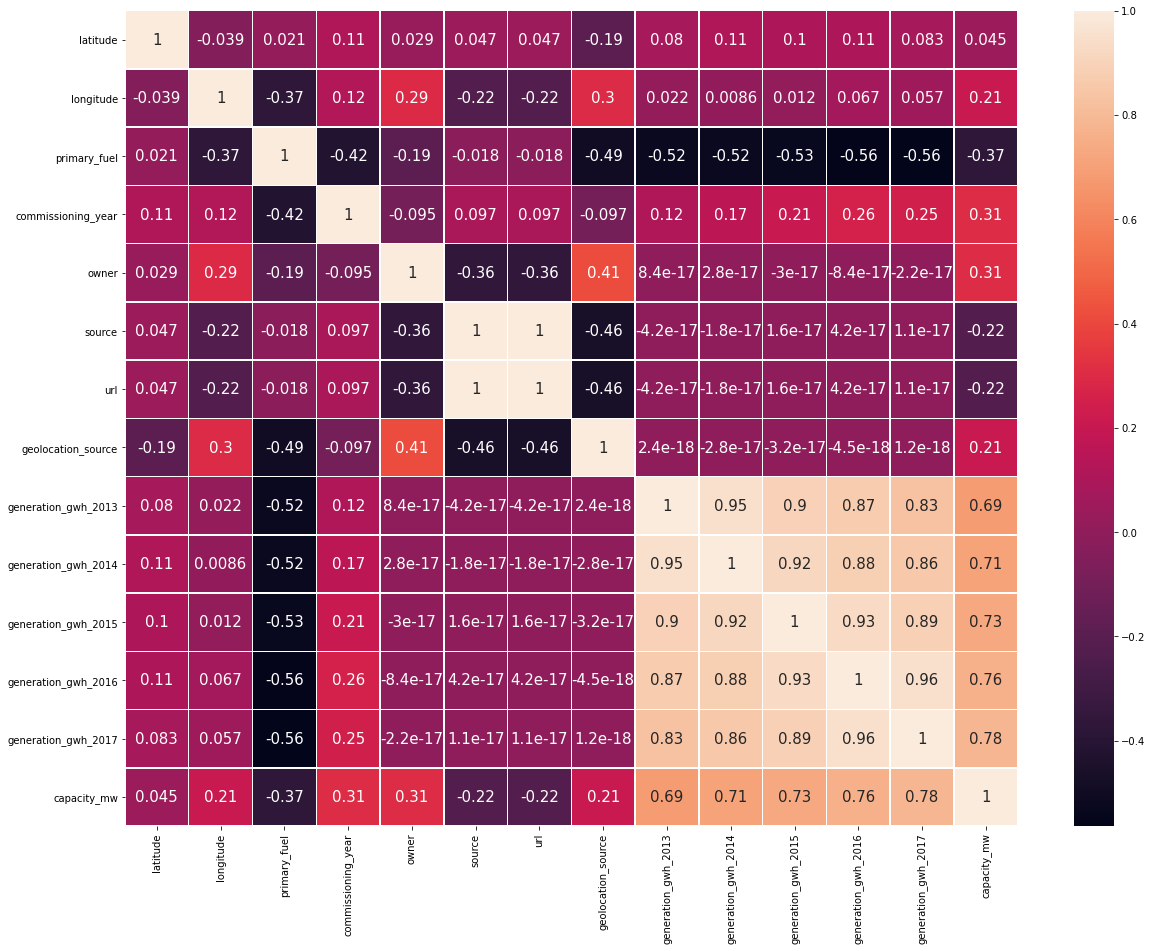

In [131]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

We can see that generation_gwh columns have high multicolinearity between them. We will use PCA to solve this issue.

In [132]:
data_pc.isnull().sum()

latitude                27
longitude               27
primary_fuel             0
commissioning_year     365
owner                    0
source                   0
url                      0
geolocation_source       0
generation_gwh_2013    505
generation_gwh_2014    488
generation_gwh_2015    464
generation_gwh_2016    452
generation_gwh_2017    446
capacity_mw              0
dtype: int64

We will impute all the missing data to perform PCA analysis

In [133]:
data_pc["commissioning_year"]=data_pc["commissioning_year"].fillna(999)
data_pc["generation_gwh_2013"]=data_pc["generation_gwh_2013"].fillna(999)
data_pc["generation_gwh_2014"]=data_pc["generation_gwh_2014"].fillna(999)
data_pc["generation_gwh_2015"]=data_pc["generation_gwh_2015"].fillna(999)
data_pc["generation_gwh_2016"]=data_pc["generation_gwh_2016"].fillna(999)
data_pc["generation_gwh_2017"]=data_pc["generation_gwh_2017"].fillna(999)
data_pc

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,1.136368,-0.935821,1.235110,0.921338,-0.441939,1.724585,1.724585,-2.459390,999.000000,999.000000,999.000000,999.000000,999.000000,2.5
1,0.547817,-0.519832,-1.016485,999.000000,0.852076,1.864312,1.864312,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000,98.0
2,0.072780,-2.315977,1.509329,999.000000,-1.774506,-0.553026,-0.553026,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000,39.2
3,0.397280,2.135311,-0.384285,0.269942,0.622662,-0.454333,-0.454333,0.400716,-0.472538,-0.501304,-0.271851,-0.256363,-0.473868,135.0
4,0.081964,1.078477,-1.016485,1.348092,0.622662,-0.454333,-0.454333,0.400716,0.360314,0.931621,1.475868,1.486651,1.343354,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.799641,0.186013,-1.016485,1.460786,0.622662,-0.454333,-0.454333,0.400716,999.000000,999.000000,-1.105071,-0.854191,-0.308219,1600.0
885,-1.301848,0.357808,1.235110,999.000000,-1.589983,1.536509,1.536509,-2.496731,999.000000,999.000000,999.000000,999.000000,999.000000,3.0
886,-0.951751,-0.249466,1.509329,999.000000,0.622662,-0.553026,-0.553026,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000,25.5
887,0.477597,-0.776999,-1.016485,999.000000,-1.647009,1.311177,1.311177,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000,80.0


Imputing an outlier value to all the missing data in features containing numerical data.

In [134]:
for column in data_pc.columns:
    data_pc[column] = data_pc[column].fillna(data_pc[column].mean())
data_pc

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,1.136368,-0.935821,1.235110,0.921338,-0.441939,1.724585,1.724585,-2.459390,999.000000,999.000000,999.000000,999.000000,999.000000,2.5
1,0.547817,-0.519832,-1.016485,999.000000,0.852076,1.864312,1.864312,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000,98.0
2,0.072780,-2.315977,1.509329,999.000000,-1.774506,-0.553026,-0.553026,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000,39.2
3,0.397280,2.135311,-0.384285,0.269942,0.622662,-0.454333,-0.454333,0.400716,-0.472538,-0.501304,-0.271851,-0.256363,-0.473868,135.0
4,0.081964,1.078477,-1.016485,1.348092,0.622662,-0.454333,-0.454333,0.400716,0.360314,0.931621,1.475868,1.486651,1.343354,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.799641,0.186013,-1.016485,1.460786,0.622662,-0.454333,-0.454333,0.400716,999.000000,999.000000,-1.105071,-0.854191,-0.308219,1600.0
885,-1.301848,0.357808,1.235110,999.000000,-1.589983,1.536509,1.536509,-2.496731,999.000000,999.000000,999.000000,999.000000,999.000000,3.0
886,-0.951751,-0.249466,1.509329,999.000000,0.622662,-0.553026,-0.553026,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000,25.5
887,0.477597,-0.776999,-1.016485,999.000000,-1.647009,1.311177,1.311177,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000,80.0


Imputing mean value to the missing data in columns latitude and longitude 

In [137]:
pca = PCA()

In [138]:
X = data_pc.drop("capacity_mw",axis=1)
X = pca.fit_transform(X)
X

array([[-8.26965864e+02,  6.39169209e+02, -4.20579916e+02, ...,
        -9.84307833e-01, -2.86319702e-01, -8.98443656e-16],
       [-1.19376835e+03, -1.61242481e+02,  4.42880405e+01, ...,
         1.65577747e+00,  4.60535293e-01, -5.76460434e-15],
       [-1.19376932e+03, -1.61244018e+02,  4.42861614e+01, ...,
        -8.34642436e-01, -9.74586337e-01,  3.91063200e-15],
       ...,
       [-1.19376735e+03, -1.61240021e+02,  4.42850771e+01, ...,
         1.54274086e+00,  5.58142034e-02,  2.12780677e-16],
       [-1.19376938e+03, -1.61244645e+02,  4.42890634e+01, ...,
        -6.41817536e-01, -4.25197198e-01, -2.37761505e-16],
       [-1.19376627e+03, -1.61237848e+02,  4.42840729e+01, ...,
         3.00065313e+00,  8.83555852e-01, -9.48268756e-17]])

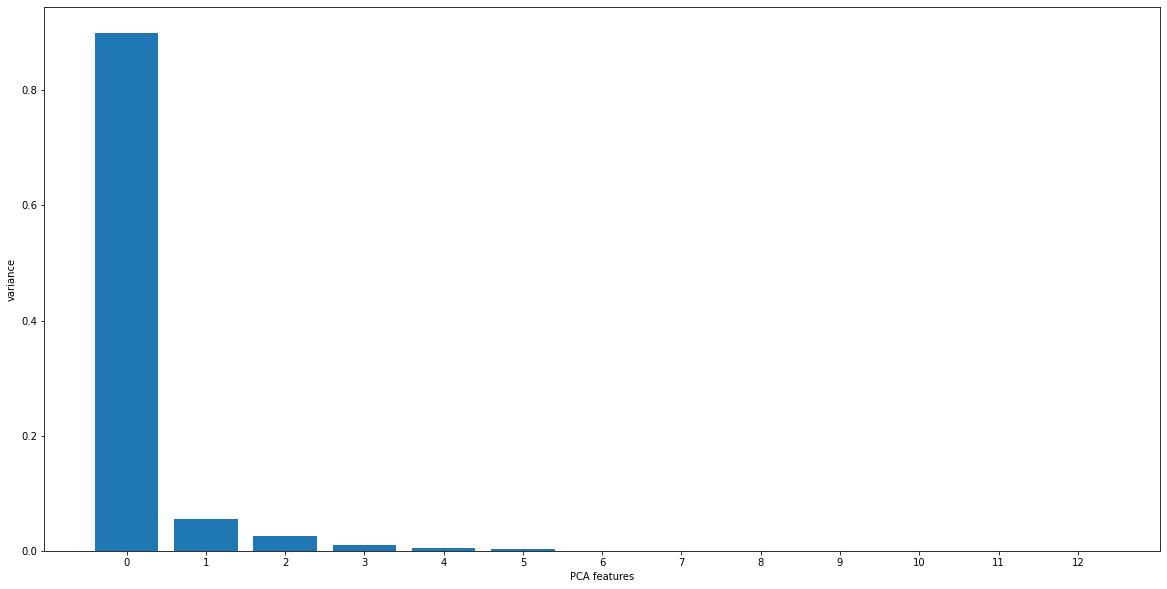

In [139]:
features = range(pca.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

We can see that using PCA transform our data has very high variance in only one PCA feature. But, we won't get much accuracy if we use the PCA transformed data. Therefore, it's better not to transform the data.

In [285]:
X = data_pc.drop("capacity_mw",axis=1)
#X = X.drop(["source","url","geolocation_source","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"],axis=1)
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.136368,-0.935821,1.235110,0.921338,-0.441939,1.724585,1.724585,-2.459390,999.000000,999.000000,999.000000,999.000000,999.000000
1,0.547817,-0.519832,-1.016485,999.000000,0.852076,1.864312,1.864312,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000
2,0.072780,-2.315977,1.509329,999.000000,-1.774506,-0.553026,-0.553026,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000
3,0.397280,2.135311,-0.384285,0.269942,0.622662,-0.454333,-0.454333,0.400716,-0.472538,-0.501304,-0.271851,-0.256363,-0.473868
4,0.081964,1.078477,-1.016485,1.348092,0.622662,-0.454333,-0.454333,0.400716,0.360314,0.931621,1.475868,1.486651,1.343354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.799641,0.186013,-1.016485,1.460786,0.622662,-0.454333,-0.454333,0.400716,999.000000,999.000000,-1.105071,-0.854191,-0.308219
885,-1.301848,0.357808,1.235110,999.000000,-1.589983,1.536509,1.536509,-2.496731,999.000000,999.000000,999.000000,999.000000,999.000000
886,-0.951751,-0.249466,1.509329,999.000000,0.622662,-0.553026,-0.553026,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000
887,0.477597,-0.776999,-1.016485,999.000000,-1.647009,1.311177,1.311177,0.400716,999.000000,999.000000,999.000000,999.000000,999.000000


We can see that PCA transform doesn't work for this dataset so we will drop the generation_gwh columns from our dataset

In [286]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=20)

Splitting the data into training and testing sets.

# Data Modeling for Power capacity using regression models

In [255]:
from sklearn.metrics import r2_score

In [287]:
from sklearn.linear_model import LinearRegression

In [288]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [289]:
print(lr.score(X_train,y_train))
lr.score(X_test,y_test)

0.3281926473521234


0.26399988131992647

In [290]:
y_pred = lr.predict(X_test)
y_pred

array([[ 4.06279407e+02],
       [ 5.39867260e+02],
       [-2.37013671e+02],
       [ 6.56563771e+02],
       [ 1.03613375e+02],
       [ 7.01862532e+02],
       [ 3.86429429e+01],
       [ 5.79525144e+02],
       [ 4.82591122e+02],
       [ 4.98218477e+02],
       [ 3.65820448e+01],
       [-2.38025837e+02],
       [ 4.81351059e+02],
       [ 2.83439041e+02],
       [ 4.20904735e+01],
       [ 2.13789558e+02],
       [ 2.07604425e+02],
       [ 7.38394725e+02],
       [ 5.22321251e+02],
       [ 6.97411627e+02],
       [ 5.80002262e+02],
       [ 3.72596951e+01],
       [ 7.19033831e+02],
       [ 7.69790019e+02],
       [ 5.11374519e+02],
       [ 5.40784327e+02],
       [ 1.42460893e+02],
       [ 4.99018192e+02],
       [-2.05951782e+00],
       [ 5.40638922e+02],
       [ 3.47507155e+02],
       [ 4.76380429e+02],
       [-3.71949047e+01],
       [-1.25787004e+02],
       [-3.26739335e+00],
       [ 5.08289793e+01],
       [ 2.18176969e+01],
       [ 5.25148959e+02],
       [-1.9

In [291]:
y_test

,capacity_mw
347,96.0
560,37.5
789,22.5
834,382.5
56,20.0
...,...
421,31.5
825,1080.0
428,460.0
431,2.1


In [292]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

564.0550212415443

In [293]:
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=3)
scores

array([0.23985621, 0.33539039, 0.27804654])

In [294]:
print(np.mean(scores),np.std(scores))

0.28443104549652526 0.03926208085793549


### Decision Tree Regression

In [295]:
from sklearn.tree import DecisionTreeRegressor


In [296]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=i)
    DTR = DecisionTreeRegressor(max_depth=2)
    DTR.fit(X_train, y_train)
    r2 = DTR.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.7119128892111348


45

In [297]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=index)

In [298]:
DTR = DecisionTreeRegressor(max_depth=2)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [299]:
print(lr.score(X_train,y_train))
lr.score(X_test,y_test)

0.30492686069862196


0.330250102589455

In [300]:
y_pred = DTR.predict(X_test)
y_pred

array([ 358.56826316, 1647.08327869,   33.52051118,   33.52051118,
         33.52051118,  358.56826316,  358.56826316,   33.52051118,
        358.56826316,  358.56826316,   33.52051118,   33.52051118,
         33.52051118,   33.52051118,  358.56826316,  358.56826316,
        358.56826316,   33.52051118,   33.52051118,   33.52051118,
         33.52051118,  358.56826316,  358.56826316,   33.52051118,
         33.52051118,   33.52051118,   33.52051118,  358.56826316,
         33.52051118,   33.52051118,   33.52051118,  358.56826316,
         33.52051118,  358.56826316, 1647.08327869,   33.52051118,
        358.56826316,   33.52051118,   33.52051118,   33.52051118,
        358.56826316,  358.56826316,   33.52051118,  358.56826316,
        358.56826316,   33.52051118,  358.56826316,   33.52051118,
        358.56826316,   33.52051118,   33.52051118,   33.52051118,
        358.56826316,  358.56826316,  358.56826316,  358.56826316,
       1647.08327869,   33.52051118,  358.56826316,  358.56826

In [301]:
r2 = DTR.score(X_test,y_test)
r2

0.7119128892111348

In [302]:
y_test

,capacity_mw
166,1200.0
640,3000.0
750,5.0
832,11.2
595,5.0
...,...
613,4.8
783,132.0
704,95.0
558,12.0


In [303]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

305.82109903131146

In [304]:
scores = cross_val_score(DTR, X_train, y_train, cv=4)
scores

array([0.49306267, 0.50572166, 0.2176513 , 0.62372581])

In [305]:
print(np.mean(scores),np.std(scores))

0.46004035695836015 0.14893172604853766


### Support Vector Regression

In [306]:
from sklearn.svm import SVR

In [307]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=i)
    svr = SVR()
    svr.fit(X_train, y_train)
    r2 = svr.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.03886114995806411


/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

8

In [308]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=index)

In [309]:
svr = SVR()
svr.fit(X_train, y_train)

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [310]:
y_pred = svr.predict(X_test)
y_pred

array([ 25.09883478, 191.46296905,  25.09875916,  25.09899822,
       191.39743966, 191.41755692, 191.45212649, 191.46219697,
       191.40559559, 191.45662908,  25.09902565,  25.09882662,
       191.43799883,  25.09915163, 191.42015618,  25.09898193,
        25.09884471, 191.45168312, 191.43527094,  25.09916752,
        25.09880341, 191.45276218,  25.09896884,  25.09902636,
        25.09901221,  38.49827158, 191.43213044, 191.46307987,
       191.46116963, 191.44192199, 191.45541445, 191.46884456,
       191.39358888, 142.81101451, 191.40686442, 191.46181023,
        25.09937456, 191.45807178,  25.09905091, 191.41703264,
       191.4631436 ,  25.09918132,  25.09902312, 191.45581088,
        25.09885719,  25.0991856 , 142.83918156,  25.09905045,
       142.75062447,  25.09897111,  38.48478963, 142.68493763,
        25.09990835,  38.48478109,  38.48087041, 191.43588451,
       191.44564416,  38.45895522, 191.45575231, 191.4160254 ,
        25.09909605,  25.09897826, 164.47012346, 191.46

In [311]:
r2 = svr.score(X_test,y_test)
r2

0.03886114995806411

In [312]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

408.769124200807

In [313]:
scores = cross_val_score(svr, X_train, y_train, scoring='r2', cv=3)
scores

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([-0.07686396, -0.15134771, -0.04177595])

In [314]:
print(np.mean(scores),np.std(scores))

-0.08999587435826502 0.0456860916354398


### Random Forest Regressor

In [315]:
from sklearn.ensemble import RandomForestRegressor


In [330]:
rfr = RandomForestRegressor(max_depth=10)
rfr.fit(X_train, y_train)

<ipython-input-330-60a61f376374>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [331]:
y_pred = rfr.predict(X_test)
y_pred

array([   7.27783622,   52.87360061,   14.52842818,   16.46274168,
       1366.76574851,  723.17552112,  117.89844872,   62.89161112,
       1368.50050111,  297.03006563,  108.06664382,   12.87426869,
        662.63998506,   21.9444142 ,  856.01078804,   11.60604304,
         16.79800547,  232.39180126,  287.03001723,   34.88873792,
          8.34693524,  107.98104095,   45.87307404,   12.83575591,
        209.30176576,   25.01852881,  343.85182232,   51.01483081,
        245.27324656,  338.70442593,  201.37795428,   46.76632026,
       1397.65324601,  440.25464398, 1045.43202659,  348.21079024,
         10.78359679,  178.66839795,   22.02053211,  669.72696673,
         67.35734329,   20.86519398,   87.17341833,  162.17253473,
         14.37438867,   21.50224744,  363.5979481 ,   21.5682963 ,
        441.86550466,   37.39003759,   14.30868133, 1449.0508437 ,
         34.19282481,   10.54404839,   10.50231505,  386.49775104,
        228.26108803,   15.28842772,  114.04043661,  614.67002

In [332]:
r2 = r2_score(y_test,y_pred)
r2

0.7592578112356503

In [333]:
y_test

,capacity_mw
35,5.0
562,80.0
495,6.6
370,12.0
305,880.0
...,...
8,290.0
108,81.5
653,10.0
677,19.7


In [337]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

204.57903269562794

In [338]:
scores = cross_val_score(rfr, X_train, y_train, scoring='r2',cv=3)
scores

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.83476903, 0.84582177, 0.91223972])

In [339]:
print(np.mean(scores),np.std(scores))

0.8642768382409184 0.03421372994487024


From the above models we can find the highest accuracy among these models. From our observation we can see that Decision Tree Regressor has the highest score relative to other models.

# Using hyperparameters on Random Forest Regression to improve accuracy.

In [342]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=i)
    rfr = RandomForestRegressor(max_depth=2)
    rfr.fit(X_train, y_train)
    r2 = rfr.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-342-d926e858b6df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

0.7822352932535956


45

In [343]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [345]:
model_params = {'n_estimators': [200,400,600,800,100],
                'max_features': [5,7,9,11,13],
                'max_depth': [20,40,60,80,100,120,140,160,180,200],
                'random_state':[25,35,45,55,65,75,85]}

In [348]:
from sklearn.model_selection import RandomizedSearchCV

rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = model_params, cv = 3)
rfr_random.fit(X_train, y_train)

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [20, 40, 60, 80, 100, 120,
                                                      140, 160, 180, 200],
                                        'max_features': [5, 7, 9, 11, 13],
                                        'n_estimators': [200, 400, 600, 800,
                                                         100],
                                        'random_state': [25, 35, 45, 55, 65, 75,
                                                         85]})

In [350]:
rfr_random.best_estimator_

RandomForestRegressor(max_depth=160, max_features=5, n_estimators=800,
                      random_state=55)

In [362]:
rfr_final = RandomForestRegressor(max_depth=160, max_features=5, n_estimators=800,random_state=55)
rfr_final.fit(X_train, y_train)

<ipython-input-362-6c83a8bdf240>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_final.fit(X_train, y_train)


RandomForestRegressor(max_depth=160, max_features=5, n_estimators=800,
                      random_state=55)

In [363]:
print(rfr.score(X_train,y_train))
rfr_final.score(X_test,y_test)

0.9821430716576356


0.8457003445740541

In [364]:
y_pred = rfr_final.predict(X_test)
y_pred

array([  46.1509375 ,   51.7156875 ,   40.19955   ,  641.1183925 ,
         44.765325  ,   30.506175  ,   51.71692917,  181.741     ,
         25.640125  ,   14.268875  ,  864.027275  ,   18.998875  ,
         42.6722    ,   90.97885   ,   41.3900875 ,  253.87872125,
         18.1049875 ,   80.04605542,   32.429575  ,   34.6357125 ,
        112.661475  ,   36.96275   ,  442.996675  ,  548.1390575 ,
         27.84025   ,  804.129375  ,  526.114925  ,  534.9806275 ,
         26.3748125 , 3772.225     ,  236.19723583,   40.606975  ,
         22.640875  ,  612.79695   ,  573.8694375 ,   18.32645   ,
         37.6275    ,   35.43425   ,    4.84362857,  130.41400125,
         11.796475  ,   12.2553    ,   33.774125  ,    9.67189583,
       1095.0105    , 1198.135     ,  494.17672125,  487.0257    ,
        406.44391   ,   25.2151875 ,   25.15035   ,  100.23575   ,
       3219.575     ,   50.2255625 ,  233.7968625 ,  818.2810475 ,
       1270.0125    ,   39.9668    ,   59.59945   ,  387.37215

In [365]:
r2 = r2_score(y_test,y_pred)
r2

0.8457003445740541

In [366]:
y_test

,capacity_mw
598,35.2
511,65.0
272,24.0
214,648.0
789,22.5
...,...
491,15.0
817,24.0
820,1.5
480,78.9


In [368]:
final_model2 = open('power_capacity_prediction.csv', 'ab')     
pickle.dump(rfr_final, final_model2)                     
final_model2.close()  